![ring supermercados](./img/ring_supermercados.png)

# Exploratory Data Analysis (EDA) - Supermercados en Valencia:

Proyecto en el cual se comparan 3 de las principales cadenas de supermercados en Valencia (Mercadona, Consum y Carrefour) para dilucidar cual es la mejor para realizar las compras domésticas.

#### Indice  
1. [Fase 1: Lectura y limpieza](#fase-1-lectura-y-limpieza)  
    1. [Funciones de apoyo](#funciones-de-apoyo)
    + [Mercadona](#depuración-y-limpieza-del-dataset-de-mercadona)
    + [Consum](#depuración-y-limpieza-del-dataset-de-consum)
    + [Carrefour](#depuración-y-limpieza-del-dataset-de-carrefour)
2. [Fase 2: Análisis y visualización](#fase-2-análisis-y-visualización)

## Fase 1: Lectura y limpieza

In [1]:
# Importación de la librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import re
import warnings

from utils import *

warnings.filterwarnings("ignore")   # Restringir la aparicion de warnings

pd.options.display.float_format = '{:.2f}'.format

### Funciones de apoyo

In [2]:
def extraer_marca_con_diccionario(nombre, marcas_conocidas):
    """
    Busca marcas conocidas en el nombre del producto
    Este es el método más preciso si tienes un listado de marcas
    """
    if pd.isna(nombre):
        return 'Desconocida'
    
    nombre_lower = nombre.lower()
    
    # Buscar marca conocida (de más específica a menos)
    for marca in sorted(marcas_conocidas, key=len, reverse=True):
        if marca.lower() in nombre_lower:
            return marca
    
    # Si no encuentra ninguna
    return "Desconocida"


# Lista de marcas
marcas_conocidas = [
    # Marcas blancas y distribución
    'Hacendado', 'Deliplus', 'Bosque Verde',
    
    # Aguas y bebidas sin alcohol
    'Bronchales', 'Cortes', 'Bezoya', 'Nestlé Aquarel', 'Font Vella', 
    'Solán de Cabras', 'Lanjarón', 'Vichy Catalan', 'San Pellegrino',
    'La Casera', 'Fonter', 'La Casa', 'Aquarius', 'Iso drink', 'nestle'
    'Fuze Tea', 'Simon Life', 'Sunny Delight', 'Bifrutas', 'Danacol',
    
    # Refrescos y colas
    'Coca-Cola', 'Fanta', 'Sprite', 'Schweppes', 'Bitter Kas',
    
    # Bebidas energéticas
    'Monster', 'Red Bull', 'Burn', 'Enervit Sport',
    
    # Cervezas
    'Heineken', 'Amstel', 'Mahou', 'San Miguel', 'Steinburg', 
    'Voll-Damm', 'Krombacher', 'Estrella Galicia', 'El Águila', 
    'Alhambra', 'Falke', 'Turia', '1897', '1906',
    
    # Bebidas alcohólicas y licores
    'Larios', 'Beefeater', 'Seagram\'s', 'Tanqueray', 'Glivery',
    'Kingerly & Sons', 'Convidado de Baco', 'Terry', 'Cutty Sark',
    'Ballantine\'s', 'Johnnie Walker', 'J&B', 'James Webb', 
    'Grand Old Parr', 'Negrita', 'La Recompensa', 'Ron Barceló', 
    'Malibu', 'Royal Swan', 'Puente Pazos', 'Knebep', 'Cassalla Cerveró',
    'Tenis', 'Dama Mayor', 'Ricard Pastis de Marseille', 'Limiñana',
    'Franzini', 'Jägermeister', 'Del Patriarca', 'Maronti', 'Martini',
    'Aperol', 'Campari', 'Cerol',
    
    # Sidras y cavas
    'El Mayu', 'Polián', 'El Lagar', 'Cabré & Sabaté', 
    'Señorío De Requena', 'Jaume Serra', 'Anna Codorníu', 'Freixenet',
    'Viña Secret Brut',
    
    # Vinos
    'Casón Histórico', 'Don Simón', 'Marina Alta', 'Fidencio',
    'Pazo de Orantes', 'Semiluna', 'Mar de Uvas', 'Arribeño',
    'Abadía Mantrús', 'Condado de Teón', 'El Pescaito', 
    'Finca La Distinguida', 'Mig Segle', 'Corredera', 
    'Castillo de Salobreña', 'Piccolo Giovanni', 'DulZ.Ze',
    'Hypatia', 'ValdeSalud', 'Dominio de Borgia', 'Elegido',
    'Masía de Altigón', 'El Coto', 'Comportillo', 'Cune',
    'Coto de Imaz', 'Pieza Rey', 'Viña Albali', 'Pata Negra',
    'Señorío de los Llanos', '13 Hectáreas', 'Borsao', 
    'El Mandamás The Guv\'Nor', 'Davida', 'Torre Oria', 
    'Para Pecar', 'Arc de Pedra', 'Diamante', 'Ponce de Albayda',
    'Finca La Malcriada', 'Dolce Cueva', 'Arteso Clarete',
    
    # Chocolates y cacao
    'Nesquik', 'ColaCao', 'La Chocolatera', 'Valor', 'Milka', 
    'Kit-Kat', 'Huesitos', 'Meivel', 'Pintarolas',
    
    # Golosinas y caramelos
    'Halls', 'Pifarré', 'Cerdán', 'Royal Mints', 'Trolli', 'Vidal',
    'Dulciora',
    
    # Salsas y condimentos
    'Hellmann\'s', 'Ligeresa', 'Musa', 'Chovi', 'Hida', 'J-Lek',
    'Casa Juncal', 'Polasal',
    
    # Aceitunas y encurtidos
    'Huerta de Barros', 'Campo Nature', 'Olives García',
    
    # Snacks
    'Lay\'s', 'Pringles', 'Cheetos', 'Munchos', 'Anitin', 'Bachman',
    'Galbusera',
    
    # Arroces y pastas
    'La Fallera', 'Sabroz', 'Bia', 'Sabor', 'Luengo', 'Felicia',
    'Armando', 'Pagani',
    
    # Café y té
    'Dolce Gusto', 'Bonka', 'Cafés Valiente', 'Marcilla', 'Climent',
    'Nescafé', 'Campina', 'PG tips', 'Amanda', 'Tassimo',
    
    # Productos infantiles y bebé
    'Hero Solo', 'Peques 3 Puleva', 'Puleva', 'Nestlé', 'Nativa',
    'Nidina', 'Dodot', 'Nenuco',
    
    # Cereales y galletas
    'Kellogg\'s', 'Corn Flakes', 'Choco Krispies', 'Brüggen',
    'Special K', 'Nature Valley', 'Enervit Sport', 'Tosta Rica',
    'Lotus Biscoff', 'Oreo', 'Chips Ahoy',
    
    # Embutidos y carnes
    'Campofrío', 'Noel', 'La Carloteña', 'Coren', 'La Selva',
    'Schara', 'El Pozo', 'Cárnicas Gállego', 'Revilla', 'Bricio',
    'De León', 'Incarlopsa', 'Jamcal', 'Paletas Marpa', 
    'Antonio Álvarez', 'Embutidos Pajariel', 'Costa Brava',
    'El Cierzo', 'Covap', 'Andares', 'La Piara', 'L\'Illa especialidades',
    'Can Pere Joan', 'Rogusa', 'La Hacienda del ibérico', 'Juan del Roble',
    
    # Quesos
    'Zanetti', 'Punteiro', 'Holland Corona', 'Holland', 'Entrepinares',
    'Babybel', 'La vaca que ríe', 'Philadelphia', 'Burgo de Arias',
    'Marcillat', 'Liptana', 'Plaisir de Roy', 'Montesinos', 'Richesmonts',
    
    # Pescado y marisco
    'Royal Greenland', 'MareDeus', 'Nortindal', 'Fiesta', 'Camós',
    
    # Productos preparados
    'Convite', 'Jamar', 'Starlux', 'Avecrem', 'Knorr', 'Hengstenberg',
    'Danet', 'Gallina Blanca',
    
    # Higiene y cosmética
    'TRESemmé', 'O\'lysee', 'Ultrex', 'Colorcor', 'Color Sensation',
    'Color Mask', 'Nelly', 'Giorgi', 'Elnett', 'Fructis', 'Syoss',
    'Nivea', 'Nivea Men', 'Axe', 'L\'Oréal', 'Atlantia', 'Dove',
    'Facial Clean', 'Montagne Jeunesse', 'Khanya', 'Wilkinson',
    'Sanex', 'Byly', 'Tulipán Negro', 'Deonat', 'Rexona', 'Lactovit',
    'Natural Honey', 'La Toja', 'Magno', 'Heno de Pravia', 'Pantene',
    'Excellence Creme', 'Gillette', 'Elvive',
    
    # Higiene bucal
    'Colgate', 'Oral-B', 'Signal', 'Sensodyne', 'Parodontax',
    'Benfix', 'Listerine',
    
    # Higiene femenina
    'Evax', 'Ausonia', 'Carefree', 'Tampax',
    
    # Perfumería
    'S3', 'Rose Nude', 'Elección', '9.60', 'Como Tú', 'Chanson d\'Eau',
    'Ikiru', 'Vuela', 'Soplo', 'Blue Shine', 'My Soul', 'Verissime',
    'Cosmic Shine', 'Éclant', 'Monogotas', 'Boem', 'Women\'Secret',
    'Sun Med', 'Colagen', 'Vitaldin', 'Moldex',
    
    # Limpieza del hogar
    'Ariel', 'Micolor', 'Beltrán', 'Estrella', 'Orache', 'Krisul',
    'Las 3 Brujas', 'Bref', 'KH-7', 'Vitroclen', 'Pronto', 'Aladdin',
    'Finish', 'Somat', 'Alibérico', 'Fairy'
    
    # Varios
    'Roura', 'Encendido', 'Tres Estrellas', 'Clipper', 'Yak',
    'Rimmel London', 'Dulcita', 'Delikuit', 'Quartett', 'Single',
    'Natura', 'Krislin', 'IGP', 'Listo para Comer', 'Granzoo', 'Compy',
    'Nuske', 'Durex', 'Royal', 'Levital'
]


In [3]:
def extract_product_format(product_name):       # Carrefour
    """
    Extrae el formato de un producto de supermercado.
    
    Parámetros:
    -----------
    product_name : str
        Nombre del producto del cual extraer el formato
        
    Retorna:
    --------
    str : El formato extraído o None si no se encuentra
    
    Ejemplos:
    ---------
    >>> extract_product_format('cerveza budweiser lager lata 33 cl')
    'lata 33 cl'
    
    >>> extract_product_format('toallitas bebe fresh aloe vera carrefour baby 6x80 uds')
    '6x80 uds'
    
    >>> extract_product_format('agua mineral bezoya 15 l')
    '15 l'
    """
    if pd.isna(product_name):
        return None
    
    product_name = str(product_name).lower()
    
    # Lista de patrones ordenados por prioridad (más específicos primero)
    patterns = [
        # Packs complejos: "pack de 12 latas de 33 cl", "mini pack 10 latas 20 cl"
        r'((?:mini\s+)?pack\s+(?:de\s+)?\d+\s+(?:latas?|botellas?|briks?|unidades?|uds?)(?:\s+de\s+\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg))?)',
        
        # Pack con cantidad y unidad: "pack de 2 unidades de 250 ml"
        r'(pack\s+de\s+\d+\s+unidades?\s+de\s+\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg))',
        
        # Pack simple: "pack de 4 bolsitas de 100 g"
        r'(pack\s+de\s+\d+\s+\w+\s+de\s+\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg|ud|uds))',
        
        # Múltiples simples: "6x80 uds", "3x72"
        r'(\d*\s*x\s*\d+(?:\s*(?:ud|uds|unidades|us|d|u|und?))?)',
        
        # Con tipo de envase: "lata 33 cl", "botella 1 l", "brik 1 l"
        r'((?:lata|botella|brik|tarrito|bolsita|frasco|sobre|paquete)\s+(?:de\s+)?\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg))',
        
        # Volumen o peso simple al final: "1 l", "500 ml", "100 g"
        r'(\d+[\.,]?\d*\s*(?:l|cl|ml|g|gr|kg)(?:\s|$))',
        
        # Unidades simples: "80 ud", "64 uds"
        r'(\d+\s*(?:u|ud|und|uds|unidades|rollo|rollos|pieza|piezas|pastilla|capsulas|pastillas|sobres|comprimidos|ampollas|lavados|hojas?)(?:\s|$))',
    ]
    
    # Buscar el primer patrón que coincida
    for pattern in patterns:
        match = re.search(pattern, product_name)
        if match:
            format_str = match.group(1).strip()
            return format_str
    
    return None

In [4]:
def extract_all_formats(product_name):
    """
    Extrae TODOS los formatos encontrados en un producto (puede haber varios).
    
    Parámetros:
    -----------
    product_name : str
        Nombre del producto del cual extraer los formatos
        
    Retorna:
    --------
    list : Lista con todos los formatos encontrados
    
    Ejemplo:
    --------
    >>> extract_all_formats('toallitas bebe fresh aloe vera carrefour baby 6x80 uds')
    ['6x80 uds']
    """
    if pd.isna(product_name):
        return []
    
    product_name = str(product_name).lower()
    
    # Patrón general que captura todos los formatos posibles
    pattern = r'(?:(?:mini\s+)?pack\s+(?:de\s+)?\d+\s+(?:latas?|botellas?|briks?|unidades?|uds?)(?:\s+de\s+\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg))?)|(?:pack\s+de\s+\d+\s+unidades?\s+de\s+\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg))|(?:pack\s+de\s+\d+\s+\w+\s+de\s+\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg|ud|uds))|(?:\d+\s*x\s*\d+(?:\s*(?:ud|uds|unidades?))?)|(?:(?:lata|botella|brik|tarrito|bolsita|frasco|sobre|paquete)\s+(?:de\s+)?\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg))|(?:\d+[\.,]?\d*\s*(?:l|cl|ml|g|kg))|(?:\d+\s*(?:ud|uds|unidades?))'
    
    matches = re.findall(pattern, product_name)
    return [m.strip() for m in matches] if matches else []


In [5]:
def categorize_format(format_str):
    """
    Categoriza un formato extraído.
    
    Parámetros:
    -----------
    format_str : str
        El formato a categorizar
        
    Retorna:
    --------
    str : La categoría del formato
    """
    if pd.isna(format_str):
        return 'sin_formato'
    
    format_str = str(format_str).lower()
    
    if 'pack' in format_str:
        return 'pack'
    elif any(word in format_str for word in ['lata', 'botella', 'brik', 'tarrito', 'bolsita', 'frasco', 'sobre']):
        return 'envase_con_cantidad'
    elif re.search(r'\d+\s*x\s*\d+', format_str):
        return 'multiple'
    elif re.search(r'\d+[\.,]?\d*\s*(l|cl|ml)', format_str):
        return 'volumen'
    elif re.search(r'\d+[\.,]?\d*\s*(g|kg)', format_str):
        return 'peso'
    elif re.search(r'\d+\s*(ud|uds|unidades?)', format_str):
        return 'unidades'
    else:
        return 'otro'


In [6]:
def calculate_total_quantity(format_str):
    """
    Calcula la cantidad total de un formato y la convierte a unidades estándar (ud, Kg, L).
    
    Conversiones:
    - Volumen: todo se convierte a Litros (L)
    - Peso: todo se convierte a Kilogramos (Kg)
    - Unidades: se mantienen como unidades (ud)
    
    Parámetros:
    -----------
    format_str : str
        El formato extraído del producto
        
    Retorna:
    --------
    float : La cantidad total en la unidad estándar, o None si no se puede calcular
    """

    if pd.isna(format_str) or format_str == '':
        return None
    
    format_str = str(format_str).lower().strip()
    
    # Patrón 1: Packs complejos tipo "pack de X unidades de Y ml/g/l/cl/kg"
    pattern_pack_complex = r'pack\s+de\s+(\d+)\s+(?:unidades?|paquetes?|latas?|botellas?|briks?)\s+de\s+(\d+[\.,]?\d*)\s*(ml|cl|l|g|kg|ud|uds)'
    match = re.search(pattern_pack_complex, format_str)
    if match:
        multiplier = float(match.group(1))
        quantity = float(match.group(2).replace(',', '.'))
        unit = match.group(3)
        
        total = multiplier * quantity
        return convert_to_standard_unit(total, unit)
    
    # Patrón 2: "pack de X botellas/briks" sin cantidad específica
    pattern_pack_simple_count = r'pack\s+(?:de\s+)?(\d+)\s+(botellas?|briks?|latas?|paquetes?|rollos?)'
    match = re.search(pattern_pack_simple_count, format_str)
    if match:
        quantity = float(match.group(1))
        return round(quantity, 0)
    
    # Patrón 3: "pack X botellas/briks" (sin "de")
    pattern_pack_no_de = r'pack\s+(\d+)\s+(botellas?|briks?|latas?)'
    match = re.search(pattern_pack_no_de, format_str)
    if match:
        quantity = float(match.group(1))
        return round(quantity, 0)
    
    # Patrón 4: Múltiples tipo "x72", "x 500", "x50"
    pattern_x = r'x\s*(\d+)'
    match = re.search(pattern_x, format_str)
    if match:
        quantity = float(match.group(1))
        return round(quantity, 0)
    
    # Patrón 5: Múltiples tipo "6x80 uds" o "100 x 6"
    pattern_multiple = r'(\d+)\s*x\s*(\d+)\s*(?:(ml|cl|l|g|kg|ud|uds|unidades?))?'
    match = re.search(pattern_multiple, format_str)
    if match:
        num1 = float(match.group(1))
        num2 = float(match.group(2))
        unit = match.group(3) if match.group(3) else 'ud'  # Asume unidades si no hay unidad
        
        total = num1 * num2
        return convert_to_standard_unit(total, unit)
    
    # Patrón 6: Cantidad con descriptores tipo "12 rollos", "30 pastillas", "4 piezas", "24 comprimidos"
    pattern_quantity_descriptor = r'(\d+)\s*(rollos?|pastillas?|piezas?|sobres?|comprimidos?|hojas?|ampollas?|capsula?|u|und(?:\b|$))'
    match = re.search(pattern_quantity_descriptor, format_str)
    if match:
        quantity = float(match.group(1))
        return round(quantity, 0)
    
    # Patrón 7: "1 paquete" - caso especial
    if re.search(r'\b1\s*paquetes?\b', format_str):
        return 1.0
    
    # Patrón 8: Pack simple tipo "pack de 12 latas de 33 cl"
    pattern_pack_with_volume = r'pack\s+de\s+(\d+)\s+(?:latas?|botellas?|briks?)\s+de\s+(\d+[\.,]?\d*)\s*(ml|cl|l|g|kg)'
    match = re.search(pattern_pack_with_volume, format_str)
    if match:
        multiplier = float(match.group(1))
        quantity = float(match.group(2).replace(',', '.'))
        unit = match.group(3)
        
        total = multiplier * quantity
        return convert_to_standard_unit(total, unit)
    
    # Patrón 9: Con envase tipo "lata 33 cl", "botella 1 l"
    pattern_container = r'(?:lata|botella|brik|tarrito|bolsita|frasco|sobre|paquete)\s+(?:de\s+)?(\d+[\.,]?\d*)\s*(ml|cl|l|g|kg)'
    match = re.search(pattern_container, format_str)
    if match:
        quantity = float(match.group(1).replace(',', '.'))
        unit = match.group(2)
        return convert_to_standard_unit(quantity, unit)
    
    # Patrón 10: Cantidad simple tipo "1500 ml", "36 cl", "80 ud"
    pattern_simple = r'(\d+[\.,]?\d*)\s*(ml|cl|l|g|kg|ud|uds|unidades?)'
    match = re.search(pattern_simple, format_str)
    if match:
        quantity = float(match.group(1).replace(',', '.'))
        unit = match.group(2)
        return convert_to_standard_unit(quantity, unit)
    
    return None


In [7]:
def convert_to_standard_unit(quantity, unit):
    """
    Convierte una cantidad a la unidad estándar correspondiente.
    
    Parámetros:
    -----------
    quantity : float
        La cantidad a convertir
    unit : str
        La unidad actual (ml, cl, l, g, kg, ud, uds)
        
    Retorna:
    --------
    float : La cantidad convertida a la unidad estándar
    """
    unit = unit.lower()
    
    # Conversiones de volumen a Litros
    if unit == 'ml':
        return round(quantity / 1000, 6)
    elif unit == 'cl':
        return round(quantity / 100, 6)
    elif unit == 'l':
        return round(quantity, 6)
    
    # Conversiones de peso a Kilogramos
    elif unit == 'g':
        return round(quantity / 1000, 6)
    elif unit == 'kg':
        return round(quantity, 6)
    
    # Unidades se mantienen igual
    elif unit in ['ud', 'uds', 'unidades', 'unidad']:
        return round(quantity, 0)
    
    return quantity


In [8]:
# Importar los datasets bajo el nombre df_supermercado_raw

# Datasets Mercadona
df_mercadona_raw = pd.read_csv("data/Raw_Data/Mercadona/mercadona_raw.csv")
df_mercadona_categorias = pd.read_csv("data/Raw_Data/Mercadona/mercadona_categorias_grupos.csv")

# Dataset Consum
df_consum_raw = pd.read_csv("data/Raw_Data/Consum/consum_raw.csv")

# Dataset Carrefour
df_carrefour_raw = pd.read_csv("data/Raw_Data/Carrefour/carrefour_raw.csv")

### Depuración y limpieza del dataset de Mercadona

In [9]:
# Visualización del dataset para entenderlo y ver depuración de los datos necesita
df_mercadona_raw.head()

,elemento_id,texto_completo,nombre,precio,precio_unidad,marca,imagen_url,categoria_url,categoria_nombre
0,1,"Aceite de oliva 0,4º Hacendado\nGarrafa 5 L\n1...","Aceite de oliva 0,4º Hacendado","18,75 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c17880...,https://tienda.mercadona.es/categories/112,112
1,3,"Aceite de oliva 0,4º Hacendado\nBotella 1 L\n3...","Aceite de oliva 0,4º Hacendado","3,85 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/65c234...,https://tienda.mercadona.es/categories/112,112
2,5,Aceite de oliva virgen extra Hacendado\nGarraf...,Aceite de oliva virgen extra Hacendado,"13,70 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c6fc6d...,https://tienda.mercadona.es/categories/112,112
3,7,Aceite de oliva virgen extra Hacendado\nBotell...,Aceite de oliva virgen extra Hacendado,"4,65 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/bd2485...,https://tienda.mercadona.es/categories/112,112
4,9,Aceite de oliva virgen extra Hacendado Gran Se...,Aceite de oliva virgen extra Hacendado Gran Se...,"5,95 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c60e6e...,https://tienda.mercadona.es/categories/112,112


In [10]:
# Información sobre el dataset
df_mercadona_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   elemento_id       4305 non-null   int64  
 1   texto_completo    4305 non-null   object 
 2   nombre            4305 non-null   object 
 3   precio            4305 non-null   object 
 4   precio_unidad     0 non-null      float64
 5   marca             0 non-null      float64
 6   imagen_url        4305 non-null   object 
 7   categoria_url     4305 non-null   object 
 8   categoria_nombre  4305 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 302.8+ KB


In [11]:
# Visualización del dataset con las categorías
df_mercadona_categorias

,URL,GrupoPrincipal,NombreCategoria
0,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
1,https://tienda.mercadona.es/categories/115,"Aceite, especias y salsas",Especias
2,https://tienda.mercadona.es/categories/116,"Aceite, especias y salsas","Mayonesa, ketchup y mostaza"
3,https://tienda.mercadona.es/categories/117,"Aceite, especias y salsas",Otras salsas
4,https://tienda.mercadona.es/categories/156,Agua y refrescos,Agua
...,...,...,...
147,https://tienda.mercadona.es/categories/107,Postres y yogures,Yogures y postres infantiles
148,https://tienda.mercadona.es/categories/99,Zumos,Fruta variada
149,https://tienda.mercadona.es/categories/100,Zumos,Melocotón y piña
150,https://tienda.mercadona.es/categories/143,Zumos,Naranja


In [12]:
# Merge del dataset y las categorias para poder entender mejor cada producto y visualización
df_mercadona_merged = df_mercadona_raw.merge(df_mercadona_categorias, left_on= "categoria_url", right_on= "URL", how= "left")
df_mercadona_merged.head()

,elemento_id,texto_completo,nombre,precio,precio_unidad,marca,imagen_url,categoria_url,categoria_nombre,URL,GrupoPrincipal,NombreCategoria
0,1,"Aceite de oliva 0,4º Hacendado\nGarrafa 5 L\n1...","Aceite de oliva 0,4º Hacendado","18,75 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c17880...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
1,3,"Aceite de oliva 0,4º Hacendado\nBotella 1 L\n3...","Aceite de oliva 0,4º Hacendado","3,85 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/65c234...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
2,5,Aceite de oliva virgen extra Hacendado\nGarraf...,Aceite de oliva virgen extra Hacendado,"13,70 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c6fc6d...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
3,7,Aceite de oliva virgen extra Hacendado\nBotell...,Aceite de oliva virgen extra Hacendado,"4,65 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/bd2485...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
4,9,Aceite de oliva virgen extra Hacendado Gran Se...,Aceite de oliva virgen extra Hacendado Gran Se...,"5,95 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c60e6e...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"


In [13]:
# Visualización de la información del nuevo dataset generado
df_mercadona_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   elemento_id       4305 non-null   int64  
 1   texto_completo    4305 non-null   object 
 2   nombre            4305 non-null   object 
 3   precio            4305 non-null   object 
 4   precio_unidad     0 non-null      float64
 5   marca             0 non-null      float64
 6   imagen_url        4305 non-null   object 
 7   categoria_url     4305 non-null   object 
 8   categoria_nombre  4305 non-null   int64  
 9   URL               4305 non-null   object 
 10  GrupoPrincipal    4305 non-null   object 
 11  NombreCategoria   4305 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 403.7+ KB


In [14]:
# Se genera una nueva columna con el formato
df_mercadona_merged.insert(3, "formato", df_mercadona_merged["texto_completo"].str.split("\n").str[1])
df_mercadona_merged.head()

,elemento_id,texto_completo,nombre,formato,precio,precio_unidad,marca,imagen_url,categoria_url,categoria_nombre,URL,GrupoPrincipal,NombreCategoria
0,1,"Aceite de oliva 0,4º Hacendado\nGarrafa 5 L\n1...","Aceite de oliva 0,4º Hacendado",Garrafa 5 L,"18,75 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c17880...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
1,3,"Aceite de oliva 0,4º Hacendado\nBotella 1 L\n3...","Aceite de oliva 0,4º Hacendado",Botella 1 L,"3,85 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/65c234...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
2,5,Aceite de oliva virgen extra Hacendado\nGarraf...,Aceite de oliva virgen extra Hacendado,Garrafa 3 L,"13,70 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c6fc6d...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
3,7,Aceite de oliva virgen extra Hacendado\nBotell...,Aceite de oliva virgen extra Hacendado,Botella 1 L,"4,65 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/bd2485...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"
4,9,Aceite de oliva virgen extra Hacendado Gran Se...,Aceite de oliva virgen extra Hacendado Gran Se...,Botella 750 ml,"5,95 € /ud.",NaN,NaN,https://prod-mercadona.imgix.net/images/c60e6e...,https://tienda.mercadona.es/categories/112,112,https://tienda.mercadona.es/categories/112,"Aceite, especias y salsas","Aceite, vinagre y sal"


In [15]:
# Se eliminan las columnas que no proporcionan información util
df_mercadona_merged.drop(columns=["elemento_id", "texto_completo", "imagen_url", "categoria_url", "categoria_nombre", "URL"], inplace= True)
df_mercadona_merged.rename(columns={"precio_unidad": "precio_ud/Kg/L", "GrupoPrincipal": "categoria",
                                    "NombreCategoria": "subcategoria"}, inplace= True)

In [16]:
# Se convierte la columna precio a float y se rellena la columna precio_kg/L
df_mercadona_merged["precio"] = df_mercadona_merged["precio"].str.extract(r"(\d+,\d{2})")[0].str.replace(',','.').astype(float)
df_mercadona_merged["precio_ud/Kg/L"] = df_mercadona_merged["precio"] / df_mercadona_merged['formato'].apply(calculate_total_quantity)
df_mercadona_merged.head()

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria
0,"Aceite de oliva 0,4º Hacendado",Garrafa 5 L,18.75,3.75,NaN,"Aceite, especias y salsas","Aceite, vinagre y sal"
1,"Aceite de oliva 0,4º Hacendado",Botella 1 L,3.85,3.85,NaN,"Aceite, especias y salsas","Aceite, vinagre y sal"
2,Aceite de oliva virgen extra Hacendado,Garrafa 3 L,13.70,4.57,NaN,"Aceite, especias y salsas","Aceite, vinagre y sal"
3,Aceite de oliva virgen extra Hacendado,Botella 1 L,4.65,4.65,NaN,"Aceite, especias y salsas","Aceite, vinagre y sal"
4,Aceite de oliva virgen extra Hacendado Gran Se...,Botella 750 ml,5.95,7.93,NaN,"Aceite, especias y salsas","Aceite, vinagre y sal"


In [17]:
# Rellenamos la columna marca, extrayendo el valor de la columna nombre
df_mercadona_merged["marca"] = df_mercadona_merged['nombre'].apply(lambda x: extraer_marca_con_diccionario(x, marcas_conocidas))

In [18]:
# Comprobamos la distribución de valores en marca
df_mercadona_merged["marca"].value_counts()

marca
Hacendado       1831
Deliplus         593
Desconocida      572
Bosque Verde     298
Compy             44
                ... 
Cerdán             1
Coto de Imaz       1
Royal Mints        1
Pieza Rey          1
Single             1
Name: count, Length: 347, dtype: int64

In [19]:
# Estandarización de la columna categoría pasandola entera a minúsculas y eliminación de acentos del nombre
df_mercadona_merged["categoria"] = df_mercadona_merged["categoria"].str.lower()
df_mercadona_merged["subcategoria"] = df_mercadona_merged["subcategoria"].str.lower()
df_mercadona_merged["nombre"] = df_mercadona_merged["nombre"].str.lower().str.replace("á","a").str.replace("é","e").str.replace("í","i").str.replace("ó","o").str.replace("ú","u")

In [20]:
# Visualización del dataset final de Mercadona y almacenamiento del mismo
df_mercadona_merged.to_csv("data/Clean_Data/mercadona.csv", index= False)
df_mercadona_merged.head()

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria
0,"aceite de oliva 0,4º hacendado",Garrafa 5 L,18.75,3.75,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal"
1,"aceite de oliva 0,4º hacendado",Botella 1 L,3.85,3.85,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal"
2,aceite de oliva virgen extra hacendado,Garrafa 3 L,13.70,4.57,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal"
3,aceite de oliva virgen extra hacendado,Botella 1 L,4.65,4.65,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal"
4,aceite de oliva virgen extra hacendado gran se...,Botella 750 ml,5.95,7.93,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal"


In [21]:
# Información final sobre el dataset depurado de Mercadona
df_Mercadona = pd.read_csv("data/Clean_Data/mercadona.csv")
df_Mercadona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          4305 non-null   object 
 1   formato         4305 non-null   object 
 2   precio          4305 non-null   float64
 3   precio_ud/Kg/L  4277 non-null   float64
 4   marca           4305 non-null   object 
 5   categoria       4305 non-null   object 
 6   subcategoria    4305 non-null   object 
dtypes: float64(2), object(5)
memory usage: 235.6+ KB


In [22]:
df_Mercadona.nunique()

nombre            3739
formato           1306
precio             552
precio_ud/Kg/L    1777
marca              347
categoria           26
subcategoria       149
dtype: int64

In [23]:
# Función para buscar articulos
def busqueda_articulo_mercadona(palabra_busqueda):
    return df_Mercadona[(df_Mercadona["nombre"].apply(lambda x: palabra_busqueda in x.lower()))]

### Depuración y limpieza del dataset de Consum

In [24]:
# Visualización del dataset para entenderlo y ver depuración de los datos necesita
df_consum_raw.head()

,codigo_producto,marca,nombre,categoria,precio_actual,precio_anterior,precio_por_unidad,promocion,patrocinado,imagen_url,producto_url,fecha_extraccion
0,7092138,NaN,NaN,Bazar,"1,20 €",NaN,"1,20 €/1 U",NaN,No,https://cdn-consum.aktiosdigitalservices.com/t...,https://tienda.consum.es/es/p/velon-rojo-cilin...,2025-10-18 11:16:25
1,7092158,NaN,NaN,Bazar,"1,20 €",NaN,"1,20 €/1 U",NaN,No,https://cdn-consum.aktiosdigitalservices.com/t...,https://tienda.consum.es/es/p/velon-blanco-cil...,2025-10-18 11:16:25
2,7347461,NaN,NaN,Bazar,"1,15 €",NaN,"1,15 €/1 U",NaN,No,https://cdn-consum.aktiosdigitalservices.com/t...,https://tienda.consum.es/es/p/papel-regalo-sur...,2025-10-18 11:16:47
3,7403009,NaN,NaN,Bazar,"1,89 €",NaN,"0,04 €/1 U",NaN,No,https://cdn-consum.aktiosdigitalservices.com/t...,https://tienda.consum.es/es/p/molde-desechable...,2025-10-18 11:16:54
4,7461700,ADI,Bol 11cm Surtido Oslo BIDASOA 1 U,Bazar,"6,99 €",NaN,"6,99 €/1 U",NaN,No,https://cdn-consum.aktiosdigitalservices.com/t...,https://tienda.consum.es/es/p/bol-11cm-surtido...,2025-10-18 11:17:15


In [25]:
# Información sobre el dataset
df_consum_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   codigo_producto    9543 non-null   int64 
 1   marca              9088 non-null   object
 2   nombre             9088 non-null   object
 3   categoria          9543 non-null   object
 4   precio_actual      9543 non-null   object
 5   precio_anterior    973 non-null    object
 6   precio_por_unidad  9543 non-null   object
 7   promocion          1288 non-null   object
 8   patrocinado        9543 non-null   object
 9   imagen_url         9543 non-null   object
 10  producto_url       9543 non-null   object
 11  fecha_extraccion   9543 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.8+ KB


In [26]:
df_consum_raw.nunique()

codigo_producto      9319
marca                1506
nombre               8540
categoria              12
precio_actual         752
precio_anterior       247
precio_por_unidad    3281
promocion              60
patrocinado             2
imagen_url           8053
producto_url         9319
fecha_extraccion      486
dtype: int64

In [27]:
# Se eliminan las columnas que no proporcionan información util
df_consum_raw.drop(columns=["codigo_producto", "precio_anterior", "promocion" ,"patrocinado", "imagen_url" ,"fecha_extraccion"], inplace= True)
df_consum_raw.rename(columns={"precio_actual": "precio", "precio_por_unidad": "precio_ud/Kg/L", }, inplace= True)
df_consum_raw.head()

,marca,nombre,categoria,precio,precio_ud/Kg/L,producto_url
0,NaN,NaN,Bazar,"1,20 €","1,20 €/1 U",https://tienda.consum.es/es/p/velon-rojo-cilin...
1,NaN,NaN,Bazar,"1,20 €","1,20 €/1 U",https://tienda.consum.es/es/p/velon-blanco-cil...
2,NaN,NaN,Bazar,"1,15 €","1,15 €/1 U",https://tienda.consum.es/es/p/papel-regalo-sur...
3,NaN,NaN,Bazar,"1,89 €","0,04 €/1 U",https://tienda.consum.es/es/p/molde-desechable...
4,ADI,Bol 11cm Surtido Oslo BIDASOA 1 U,Bazar,"6,99 €","6,99 €/1 U",https://tienda.consum.es/es/p/bol-11cm-surtido...


In [28]:
# Se convierten las columnas de precio a float
df_consum_raw["precio"] = df_consum_raw["precio"].str.replace(",",".").str.replace("€","").astype(float)
df_consum_raw["precio_ud/Kg/L"] = df_consum_raw["precio_ud/Kg/L"].str.extract(r'([\d,]+)\s*€')[0].str.replace(',', '.').astype(float)


In [29]:
# Se rellenan los valores vacios en el nombre utilizando como referencia la url y se elimina dicha columna
df_consum_raw['nombre'] = df_consum_raw['nombre'].fillna(df_consum_raw['producto_url'].str.split('/').str[-2].str.replace('-', ' ').str.title())
df_consum_raw.drop(columns=["producto_url"], inplace= True)

# Se rellena los valores NaN de la categoría marca con el valor Desconocida
df_consum_raw["marca"] = df_consum_raw["marca"].fillna("Desconocida")

df_consum_raw.head()

,marca,nombre,categoria,precio,precio_ud/Kg/L
0,Desconocida,Velon Rojo Cilindro,Bazar,1.20,1.20
1,Desconocida,Velon Blanco Cilindro,Bazar,1.20,1.20
2,Desconocida,Papel Regalo Surtido Rollo 70 Cm X 2 M,Bazar,1.15,1.15
3,Desconocida,Molde Desechable Para Magdalena,Bazar,1.89,0.04
4,ADI,Bol 11cm Surtido Oslo BIDASOA 1 U,Bazar,6.99,6.99


In [30]:
# Comprobamos la distribución de valores en marca
df_consum_raw["marca"].value_counts()

marca
CONSUM         1485
Desconocida     455
MAYBELLINE      200
KYREY           159
REVLON          107
               ... 
KIDS WORLD        1
KOJAK             1
KRAFT             1
LA ABUELA         1
LA CUEVA          1
Name: count, Length: 1507, dtype: int64

In [31]:
# Se genera una nueva columna con el formato
df_consum_raw.insert(2, "formato", df_consum_raw['nombre'].apply(extract_product_format))
df_consum_raw["formato"].fillna("1 paquete", inplace= True)
df_consum_raw.head()

,marca,nombre,formato,categoria,precio,precio_ud/Kg/L
0,Desconocida,Velon Rojo Cilindro,1 paquete,Bazar,1.20,1.20
1,Desconocida,Velon Blanco Cilindro,1 paquete,Bazar,1.20,1.20
2,Desconocida,Papel Regalo Surtido Rollo 70 Cm X 2 M,x 2,Bazar,1.15,1.15
3,Desconocida,Molde Desechable Para Magdalena,1 paquete,Bazar,1.89,0.04
4,ADI,Bol 11cm Surtido Oslo BIDASOA 1 U,1 u,Bazar,6.99,6.99


In [32]:
# Estandarización de la columna categoría pasandola entera a minúsculas  y eliminación de acentos del nombre
df_consum_raw["categoria"] = df_consum_raw["categoria"].str.lower()
df_consum_raw["nombre"] = df_consum_raw["nombre"].str.lower().str.replace("á","a").str.replace("é","e").str.replace("í","i").str.replace("ó","o").str.replace("ú","u")

In [33]:
# Reordenación y visualización del dataset final de Consum y almacenamiento del mismo
df_consum_raw = df_consum_raw[["nombre", "formato", "precio", "precio_ud/Kg/L", "marca", "categoria"]]
df_consum_raw.to_csv("data/Clean_Data/consum.csv", index= False)
df_consum_raw.head()

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria
0,velon rojo cilindro,1 paquete,1.20,1.20,Desconocida,bazar
1,velon blanco cilindro,1 paquete,1.20,1.20,Desconocida,bazar
2,papel regalo surtido rollo 70 cm x 2 m,x 2,1.15,1.15,Desconocida,bazar
3,molde desechable para magdalena,1 paquete,1.89,0.04,Desconocida,bazar
4,bol 11cm surtido oslo bidasoa 1 u,1 u,6.99,6.99,ADI,bazar


In [34]:
# Información final sobre el dataset depurado de Consum
df_Consum = pd.read_csv("data/Clean_Data/consum.csv")
df_Consum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          9543 non-null   object 
 1   formato         9543 non-null   object 
 2   precio          9543 non-null   float64
 3   precio_ud/Kg/L  9543 non-null   float64
 4   marca           9543 non-null   object 
 5   categoria       9543 non-null   object 
dtypes: float64(2), object(4)
memory usage: 447.5+ KB


In [35]:
df_Consum.nunique()

nombre            8967
formato            965
precio             752
precio_ud/Kg/L    2107
marca             1507
categoria           12
dtype: int64

In [36]:
# Función para buscar articulos
def busqueda_articulo_consum(palabra_busqueda):
    return df_Consum[(df_Consum["nombre"].apply(lambda x: palabra_busqueda in x.lower()))]

### Depuración y limpieza del dataset de Carrefour

In [37]:
# Visualización del dataset para entenderlo y ver depuración de los datos necesita
df_carrefour_raw.head()

,item_name,item_id,item_ean,price,currency,item_brand,item_category,quantity,discount,archivo_origen,carpeta_origen,coupon,index,item_internal_id,item_list_name,item_provider,item_provider_type,item_shipping,item_sms,item_variant
0,toallitas-bebe-fres-aloe-vera-carrefour-80-ud,78675,3560071207687,1.05,EUR,carrefour-baby,cat20006-bebe,1,NaN,bebe\view-source_https___www.carrefour.es_supe...,bebe,NaN,1,2002916053,catalog,carrefour,carrefour,home_delivery|drive,78675,NaN
1,toallitas-bebe-fresh-aloe-vera-carrefour-baby-...,752063,3560070222780,5.85,EUR,carrefour-baby,cat20006-bebe,1,NaN,bebe\view-source_https___www.carrefour.es_supe...,bebe,NaN,2,2002618659,catalog,carrefour,carrefour,home_delivery|drive,752063,NaN
2,preparado-lacteo-infantil-de-crecimiento-desde...,575835,8411700012217,1.99,EUR,puleva,cat20006-bebe,1,NaN,bebe\view-source_https___www.carrefour.es_supe...,bebe,NaN,3,2003043940,catalog,carrefour,carrefour,home_delivery|drive,575835,NaN
3,toallitas-para-bebe-dodot-basico-54-ud,216376,8001090139504,0.99,EUR,dodot-basico,cat20006-bebe,1,NaN,bebe\view-source_https___www.carrefour.es_supe...,bebe,NaN,4,vc4a-2045483,catalog,carrefour,carrefour,home_delivery|drive,216376,NaN
4,preparado-lacteo-infantil-de-crecimiento-con-c...,705355,8411700012415,2.09,EUR,puleva,cat20006-bebe,1,NaN,bebe\view-source_https___www.carrefour.es_supe...,bebe,NaN,5,2003044008,catalog,carrefour,carrefour,home_delivery|drive,705355,NaN


In [38]:
# Información sobre el dataset
df_carrefour_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7604 entries, 0 to 7603
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_name           7600 non-null   object 
 1   item_id             7604 non-null   int64  
 2   item_ean            7604 non-null   int64  
 3   price               7604 non-null   float64
 4   currency            7604 non-null   object 
 5   item_brand          7392 non-null   object 
 6   item_category       7604 non-null   object 
 7   quantity            7604 non-null   int64  
 8   discount            34 non-null     float64
 9   archivo_origen      7604 non-null   object 
 10  carpeta_origen      7604 non-null   object 
 11  coupon              1158 non-null   object 
 12  index               7604 non-null   int64  
 13  item_internal_id    7604 non-null   object 
 14  item_list_name      7604 non-null   object 
 15  item_provider       7604 non-null   object 
 16  item_p

In [39]:
df_carrefour_raw.nunique()

item_name             7345
item_id               7375
item_ean              7375
price                  818
currency                 1
item_brand            1081
item_category            9
quantity                 1
discount                21
archivo_origen         319
carpeta_origen           9
coupon                  15
index                   24
item_internal_id      7375
item_list_name           1
item_provider            1
item_provider_type       1
item_shipping            1
item_sms              7375
item_variant            20
dtype: int64

In [40]:
# Se eliminan las columnas que no proporcionan información util
df_carrefour_raw.drop(columns=["item_id", "item_ean", "currency", "quantity", "discount", "archivo_origen", "carpeta_origen", "coupon",
                               "index", "item_internal_id", "item_list_name", "item_provider", "item_provider_type", "item_shipping",
                               "item_sms", "item_variant"], inplace= True)
df_carrefour_raw.rename(columns={"item_name": "nombre", "price": "precio" , "item_brand": "marca" ,
                                 "item_category": "categoria"}, inplace= True)
# Existen 4 valores nulos
df_carrefour_raw.drop(df_carrefour_raw[df_carrefour_raw["nombre"].isna()].index, inplace= True)


df_carrefour_raw.head()

,nombre,precio,marca,categoria
0,toallitas-bebe-fres-aloe-vera-carrefour-80-ud,1.05,carrefour-baby,cat20006-bebe
1,toallitas-bebe-fresh-aloe-vera-carrefour-baby-...,5.85,carrefour-baby,cat20006-bebe
2,preparado-lacteo-infantil-de-crecimiento-desde...,1.99,puleva,cat20006-bebe
3,toallitas-para-bebe-dodot-basico-54-ud,0.99,dodot-basico,cat20006-bebe
4,preparado-lacteo-infantil-de-crecimiento-con-c...,2.09,puleva,cat20006-bebe


In [41]:
# Se ajusta el formato de las columnas
df_carrefour_raw["categoria"] = df_carrefour_raw["categoria"].str.extract(r'(cat\d+)([\w-]+)')[1].str.replace("-","")
df_carrefour_raw["marca"] = df_carrefour_raw["marca"].str.replace("-"," ")
df_carrefour_raw["nombre"] = df_carrefour_raw["nombre"].str.replace("-"," ")

df_carrefour_raw.head()

,nombre,precio,marca,categoria
0,toallitas bebe fres aloe vera carrefour 80 ud,1.05,carrefour baby,bebe
1,toallitas bebe fresh aloe vera carrefour baby ...,5.85,carrefour baby,bebe
2,preparado lacteo infantil de crecimiento desde...,1.99,puleva,bebe
3,toallitas para bebe dodot basico 54 ud,0.99,dodot basico,bebe
4,preparado lacteo infantil de crecimiento con c...,2.09,puleva,bebe


In [42]:
# Se rellenan los valores vacios en la marca utilizando como referencia el nombre

mask = df_carrefour_raw["marca"].isna()
df_carrefour_raw.loc[mask, "marca"] = df_carrefour_raw.loc[mask, "nombre"].apply(lambda x: extraer_marca_con_diccionario(x, marcas_conocidas))
df_carrefour_raw.head()

,nombre,precio,marca,categoria
0,toallitas bebe fres aloe vera carrefour 80 ud,1.05,carrefour baby,bebe
1,toallitas bebe fresh aloe vera carrefour baby ...,5.85,carrefour baby,bebe
2,preparado lacteo infantil de crecimiento desde...,1.99,puleva,bebe
3,toallitas para bebe dodot basico 54 ud,0.99,dodot basico,bebe
4,preparado lacteo infantil de crecimiento con c...,2.09,puleva,bebe


In [43]:
# Se genera una nueva columna con el formato
df_carrefour_raw.insert(1, "formato", df_carrefour_raw['nombre'].apply(extract_product_format))
df_carrefour_raw["formato"].fillna("1 paquete", inplace= True)
df_carrefour_raw.head()


,nombre,formato,precio,marca,categoria
0,toallitas bebe fres aloe vera carrefour 80 ud,80 ud,1.05,carrefour baby,bebe
1,toallitas bebe fresh aloe vera carrefour baby ...,6x80 ud,5.85,carrefour baby,bebe
2,preparado lacteo infantil de crecimiento desde...,brik 1 l,1.99,puleva,bebe
3,toallitas para bebe dodot basico 54 ud,54 ud,0.99,dodot basico,bebe
4,preparado lacteo infantil de crecimiento con c...,brik 1 l,2.09,puleva,bebe


In [44]:
# Se genera una nueva columna con el precio por ud/kg/L
df_carrefour_raw.insert(3, "precio_ud/Kg/L", df_carrefour_raw["precio"] / df_carrefour_raw["formato"].apply(calculate_total_quantity))
df_carrefour_raw.head()

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria
0,toallitas bebe fres aloe vera carrefour 80 ud,80 ud,1.05,0.01,carrefour baby,bebe
1,toallitas bebe fresh aloe vera carrefour baby ...,6x80 ud,5.85,0.07,carrefour baby,bebe
2,preparado lacteo infantil de crecimiento desde...,brik 1 l,1.99,1.99,puleva,bebe
3,toallitas para bebe dodot basico 54 ud,54 ud,0.99,0.02,dodot basico,bebe
4,preparado lacteo infantil de crecimiento con c...,brik 1 l,2.09,2.09,puleva,bebe


In [45]:
# Estandarización de la columna categoría pasandola entera a minúsculas y eliminación de acentos del nombre
df_carrefour_raw["categoria"] = df_carrefour_raw["categoria"].str.lower()
df_carrefour_raw["nombre"] = df_carrefour_raw["nombre"].str.lower().str.replace("á","a").str.replace("é","e").str.replace("í","i").str.replace("ó","o").str.replace("ú","u")

In [46]:
# Visualización del dataset final de Carrefour y almacenamiento del mismo
df_carrefour_raw.to_csv("data/Clean_Data/carrefour.csv", index= False)
df_carrefour_raw.head()

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria
0,toallitas bebe fres aloe vera carrefour 80 ud,80 ud,1.05,0.01,carrefour baby,bebe
1,toallitas bebe fresh aloe vera carrefour baby ...,6x80 ud,5.85,0.07,carrefour baby,bebe
2,preparado lacteo infantil de crecimiento desde...,brik 1 l,1.99,1.99,puleva,bebe
3,toallitas para bebe dodot basico 54 ud,54 ud,0.99,0.02,dodot basico,bebe
4,preparado lacteo infantil de crecimiento con c...,brik 1 l,2.09,2.09,puleva,bebe


In [47]:
# Información final sobre el dataset depurado de Carrefour
df_Carrefour = pd.read_csv("data/Clean_Data/carrefour.csv")
df_Carrefour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          7600 non-null   object 
 1   formato         7600 non-null   object 
 2   precio          7600 non-null   float64
 3   precio_ud/Kg/L  7600 non-null   float64
 4   marca           7600 non-null   object 
 5   categoria       7600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 356.4+ KB


In [48]:
df_Carrefour.nunique()

nombre            7345
formato            950
precio             818
precio_ud/Kg/L    3971
marca             1089
categoria            9
dtype: int64

In [49]:
# Función para buscar articulos
def busqueda_articulo_carrefour(palabra_busqueda):
    return df_Carrefour[(df_Carrefour["nombre"].apply(lambda x: palabra_busqueda in x.lower()))]

## Fase 2: Análisis y visualización

In [50]:
# Recapitulación de los datos y descripción de los mismos
# Mercadona
display(df_Mercadona.describe(), df_Mercadona.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          4305 non-null   object 
 1   formato         4305 non-null   object 
 2   precio          4305 non-null   float64
 3   precio_ud/Kg/L  4277 non-null   float64
 4   marca           4305 non-null   object 
 5   categoria       4305 non-null   object 
 6   subcategoria    4305 non-null   object 
dtypes: float64(2), object(5)
memory usage: 235.6+ KB


,precio,precio_ud/Kg/L
count,4305.00,4277.00
mean,3.63,11.80
std,11.42,77.62
min,0.18,0.00
25%,1.50,1.10
50%,2.30,4.62
75%,3.90,10.42
max,504.00,4625.00


None

In [51]:
# Consum
display(df_Consum.describe(), df_Consum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          9543 non-null   object 
 1   formato         9543 non-null   object 
 2   precio          9543 non-null   float64
 3   precio_ud/Kg/L  9543 non-null   float64
 4   marca           9543 non-null   object 
 5   categoria       9543 non-null   object 
dtypes: float64(2), object(4)
memory usage: 447.5+ KB


,precio,precio_ud/Kg/L
count,9543.00,9543.00
mean,4.11,9.88
std,5.24,17.65
min,0.14,0.01
25%,1.75,2.27
50%,2.79,6.63
75%,4.59,12.50
max,199.00,913.89


None

In [52]:
# Carrefour
display(df_Carrefour.describe(), df_Carrefour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre          7600 non-null   object 
 1   formato         7600 non-null   object 
 2   precio          7600 non-null   float64
 3   precio_ud/Kg/L  7600 non-null   float64
 4   marca           7600 non-null   object 
 5   categoria       7600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 356.4+ KB


,precio,precio_ud/Kg/L
count,7600.00,7600.00
mean,5.72,22.61
std,7.16,121.58
min,0.24,0.00
25%,1.88,1.39
50%,3.31,5.07
75%,6.29,13.16
max,135.00,4660.00


None

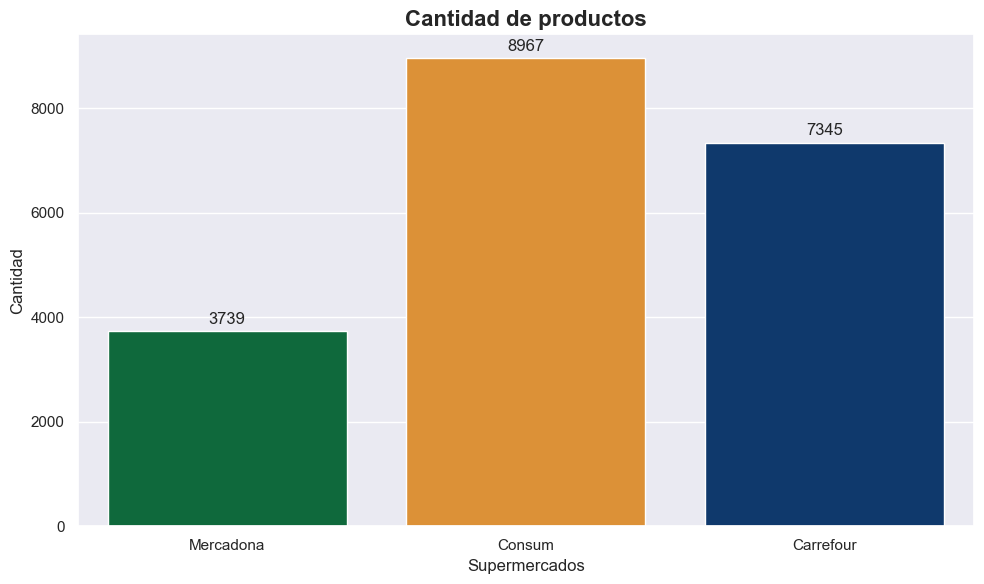

In [53]:
# Visualización del total de productos, marcas y categorías por supermercado

# Configurar el estilo de seaborn
sns.set_theme(style="darkgrid")
colores = ["#00783c", "#F8931B", "#00387b"]

# Datos
data = {
    'Categoría': ["Mercadona", "Consum", "Carrefour"],
    'Valores': [df_Mercadona["nombre"].nunique(), df_Consum["nombre"].nunique(), df_Carrefour["nombre"].nunique()]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Categoría', y='Valores', palette= colores)

# Personalizar el gráfico
plt.title('Cantidad de productos', fontsize=16, fontweight='bold')
plt.xlabel('Supermercados', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

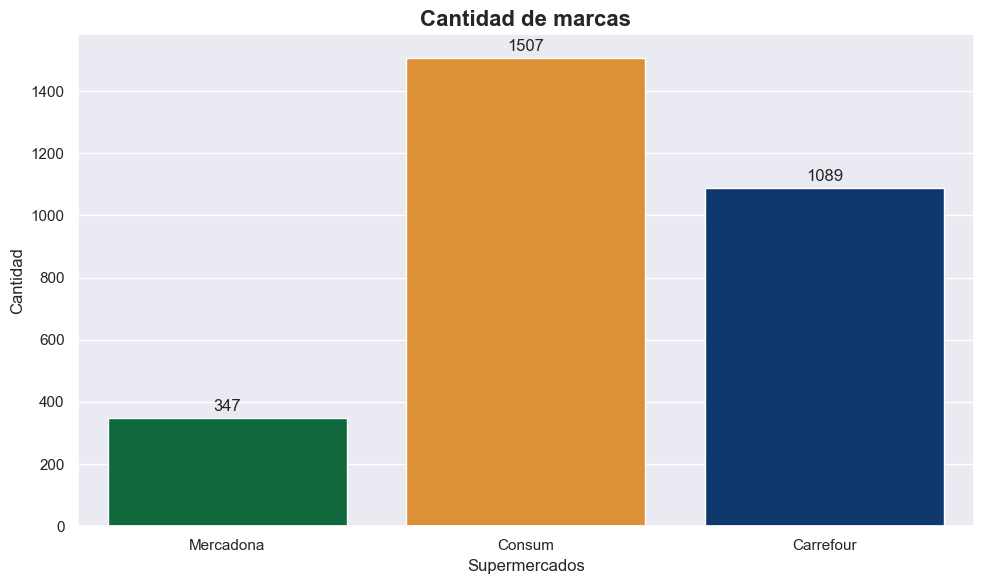

In [54]:
# Datos
data = {
    'Categoría': ["Mercadona", "Consum", "Carrefour"],
    'Valores': [df_Mercadona["marca"].nunique(), df_Consum["marca"].nunique(), df_Carrefour["marca"].nunique()]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Categoría', y='Valores', palette= colores)

# Personalizar el gráfico
plt.title('Cantidad de marcas', fontsize=16, fontweight='bold')
plt.xlabel('Supermercados', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

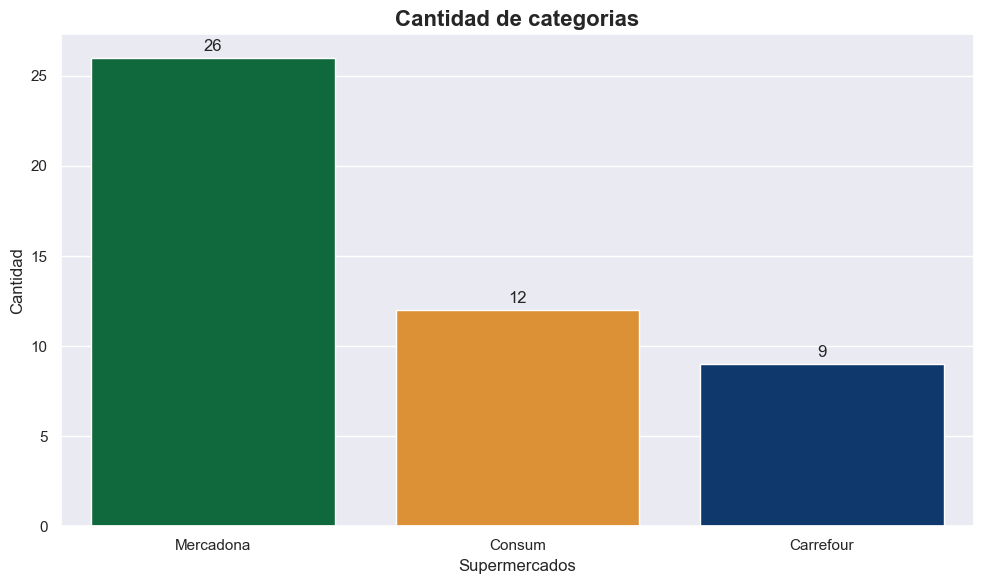

In [55]:
# Datos
data = {
    'Categoría': ["Mercadona", "Consum", "Carrefour"],
    'Valores': [df_Mercadona["categoria"].nunique(), df_Consum["categoria"].nunique(), df_Carrefour["categoria"].nunique()]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Categoría', y='Valores', palette= colores)

# Personalizar el gráfico
plt.title('Cantidad de categorias', fontsize=16, fontweight='bold')
plt.xlabel('Supermercados', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [56]:
display(
df_Mercadona["categoria"].unique(),
df_Consum["categoria"].unique(),
df_Carrefour["categoria"].unique(),
)

array(['aceite, especias y salsas', 'agua y refrescos', 'aperitivos',
       'arroz, legumbres y pasta', 'azúcar, caramelos y chocolate',
       'bebé', 'bodega', 'cacao, café e infusiones', 'carne',
       'cereales y galletas', 'charcutería y quesos', 'congelados',
       'conservas, caldos y cremas', 'cuidado del cabello',
       'cuidado facial y corporal', 'fitoterapia y parafarmacia',
       'fruta y verdura', 'huevos, leche y mantequilla',
       'limpieza y hogar', 'maquillaje', 'marisco y pescado', 'mascotas',
       'panadería y pastelería', 'pizzas y platos preparados',
       'postres y yogures', 'zumos'], dtype=object)

array(['bazar', 'bebidas', 'congelados', 'cuidado personal', 'despensa',
       'droguería', 'ecológico y saludable', 'frescos', 'horno',
       'infantil', 'mascotas', 'platos preparados'], dtype=object)

array(['bebe', 'bebidas', 'congelados', 'ladespensa', 'frescos',
       'limpiezadelhogar', 'mascotas', 'parafarmacia',
       'perfumeriaehigiene'], dtype=object)

Podemos ver que Consum es el lider en cuanto a número de productos y marcas, seguido por Carrefour y dejando muy atrás en estos aspectos a Mercadona, si bien esta situación se vuelve totalmente al revés en cuanto a categorías de productos.  
Sin embargo tras analizar los categorías en sí mismas se observa que Mercadona subdivide mucho más su catálogo, diferenciando entre "Agua y refrescos", "Bodega", "Cacao, café e infusiones" y "Zumos" para catalogar todos los productos que los otros supermercados agrupan simplemente bajo la etiqueta "Bebidas"

In [57]:
# Generamos un dataset combinando los tres para analizarlo mejor

df_Mercadona['supermercado'] = 'Mercadona'
df_Consum['supermercado'] = 'Consum'
df_Carrefour['supermercado'] = 'Carrefour'

df_completo = pd.concat([df_Mercadona, df_Consum, df_Carrefour], ignore_index=True)
df_completo.head()

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria,supermercado
0,"aceite de oliva 0,4º hacendado",Garrafa 5 L,18.75,3.75,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal",Mercadona
1,"aceite de oliva 0,4º hacendado",Botella 1 L,3.85,3.85,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal",Mercadona
2,aceite de oliva virgen extra hacendado,Garrafa 3 L,13.70,4.57,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal",Mercadona
3,aceite de oliva virgen extra hacendado,Botella 1 L,4.65,4.65,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal",Mercadona
4,aceite de oliva virgen extra hacendado gran se...,Botella 750 ml,5.95,7.93,Hacendado,"aceite, especias y salsas","aceite, vinagre y sal",Mercadona


In [58]:
df_completo.marca.value_counts()[0:5]

marca
carrefour      1973
Hacendado      1831
CONSUM         1485
Desconocida    1223
Deliplus        593
Name: count, dtype: int64

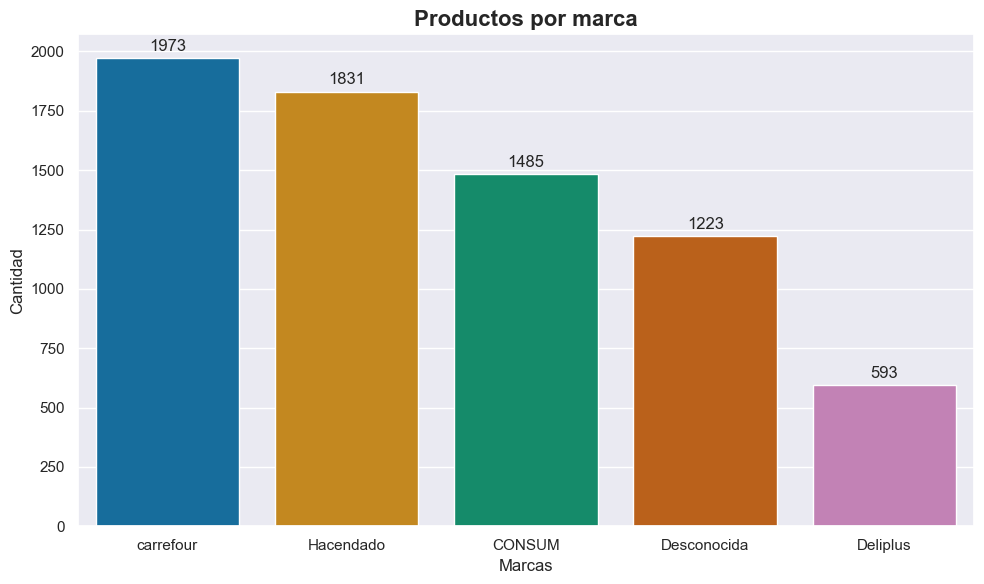

In [59]:
# Top 5 marcas globales
# Datos
data = {
    'Categoría': df_completo.marca.value_counts()[0:5].index,
    'Valores': df_completo.marca.value_counts()[0:5]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Categoría', y='Valores', palette= "colorblind")

# Personalizar el gráfico
plt.title('Productos por marca', fontsize=16, fontweight='bold')
plt.xlabel('Marcas', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se observa que el top 3 de marcas con mas presencia son las marcas blancas de cada supermercado, seguidas de marcas desconocidas que son productos sin marca, asociados a carnicería, pescadería o frutería.  
Ocupa el último lugar Deliplus, que se trata de la marca blanca de Mercadona para productos cosméticos, con lo que colocaría a Mercadona en primera posición en cuanto a marcas propias.

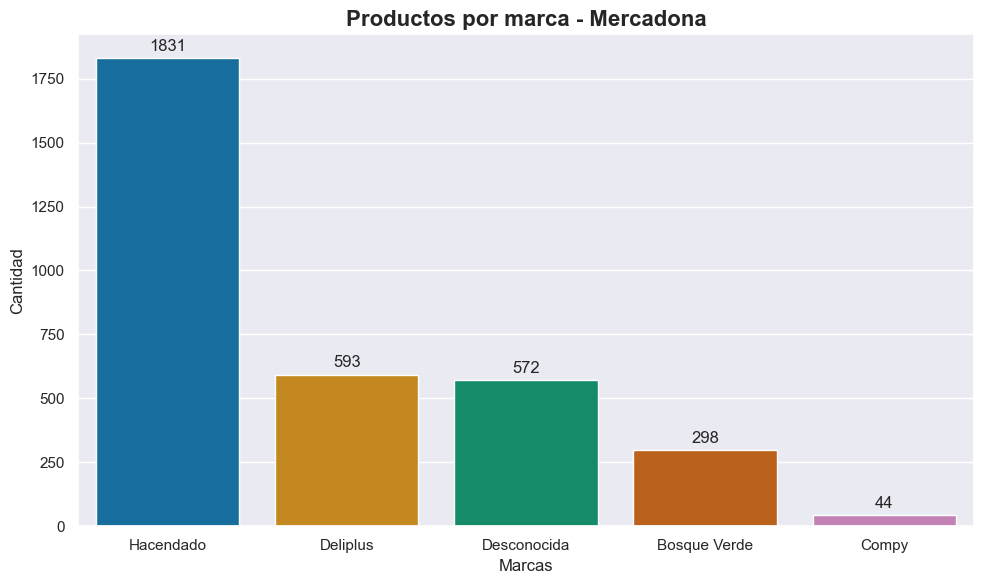

In [60]:
# Top 5 marcas Mercadona
# Datos
data = {
    'Categoría': df_Mercadona.marca.value_counts()[0:5].index,
    'Valores': df_Mercadona.marca.value_counts()[0:5]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Categoría', y='Valores', palette= "colorblind")

# Personalizar el gráfico
plt.title('Productos por marca - Mercadona', fontsize=16, fontweight='bold')
plt.xlabel('Marcas', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

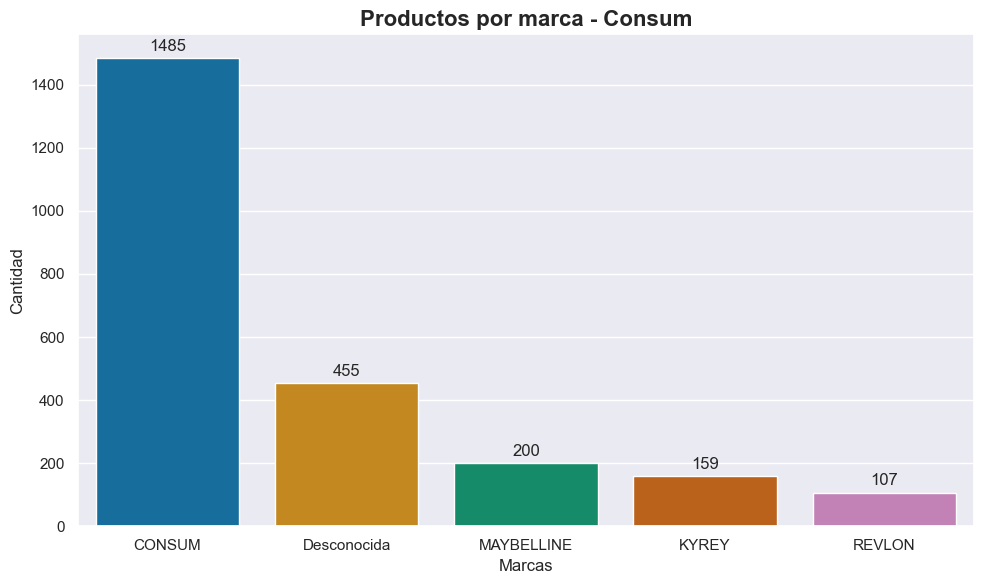

In [61]:
# Top 5 marcas Consum
# Datos
data = {
    'Categoría': df_Consum.marca.value_counts()[0:5].index,
    'Valores': df_Consum.marca.value_counts()[0:5]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Categoría', y='Valores', palette= "colorblind")

# Personalizar el gráfico
plt.title('Productos por marca - Consum', fontsize=16, fontweight='bold')
plt.xlabel('Marcas', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

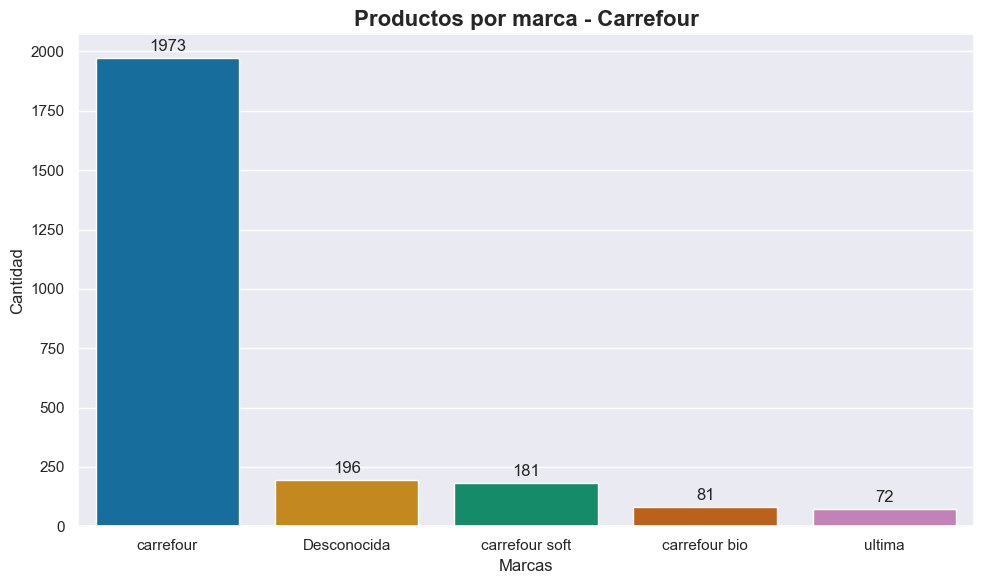

In [62]:
# Top 5 marcas Carrefour
# Datos
data = {
    'Categoría': df_Carrefour.marca.value_counts()[0:5].index,
    'Valores': df_Carrefour.marca.value_counts()[0:5]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Categoría', y='Valores', palette= "colorblind")

# Personalizar el gráfico
plt.title('Productos por marca - Carrefour', fontsize=16, fontweight='bold')
plt.xlabel('Marcas', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

De la distribución de marcas por supermercado podemos apreciar que:
Los tres supermercados están controlados por su marcas propias, especialmente en el caso de Mercadona, donde solo aparecen estas.  
En Consum destaca que las posiciones 3 a 5 son de productos de cosmética, siendo la tercera y quinta posiciones de marcas ajenas.  
Mientas que en Carrefour solo la última posición es una marca ajena, en este caso dedicada a comida para máscotas.

In [63]:
# Analisis 5 productos más caros - Mercadona
display(
df_Mercadona.sort_values("precio", ascending= False).head(5),
df_Mercadona.sort_values("precio_ud/Kg/L", ascending= False).head(5),
)

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria,supermercado
1547,jamon bellota iberico 100% covap,Pieza 9 kg aprox.,504.00,56.00,Covap,charcutería y quesos,jamón serrano,Mercadona
1546,jamon de bellota iberico 50% la hacienda del i...,Pieza 9 kg aprox.,414.00,46.00,La Hacienda del ibérico,charcutería y quesos,jamón serrano,Mercadona
1548,jamon de bellota iberico 100% andares,"Pieza 7,2 kg aprox.",250.00,34.72,Andares,charcutería y quesos,jamón serrano,Mercadona
1545,jamon de cebo iberico 50% la hacienda del iberico,"Pieza 8,5 kg aprox.",144.50,17.00,La Hacienda del ibérico,charcutería y quesos,jamón serrano,Mercadona
1549,jamon de teruel raza duroc el cierzo,"Pieza 7,5 kg aprox.",89.00,11.87,El Cierzo,charcutería y quesos,jamón serrano,Mercadona


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria,supermercado
48,azafran hebra hacendado,"Paquete 0,4 g",1.85,4625.00,Hacendado,"aceite, especias y salsas",especias,Mercadona
2346,capsulas para ojos regen skin deliplus,"Tarro 30 cápsulas (3,9 ml)",5.00,1282.05,Deliplus,cuidado facial y corporal,cuidado e higiene facial,Mercadona
2290,stick para pies anti-rozaduras deliplus,Bote 4 ml,2.50,625.00,Deliplus,cuidado facial y corporal,cuidado corporal,Mercadona
2213,polvos voluminizador para el cabello volum fix...,Bote 10 g,3.95,395.00,Deliplus,cuidado del cabello,fijación cabello,Mercadona
2664,capsulas probiotico deliplus,"Caja 30 cápsulas (17,85 g)",5.95,333.33,Deliplus,fitoterapia y parafarmacia,fitoterapia,Mercadona


En Mercadona se observa que los productos más caros a la venta son distintas piezas de jamón. Son formatos de gran peso en el cual el precio/kg sale entre 12 y 60 € aproximadamente.  
Sin embargo los productos con precio/kg o L más elevados son productos a priori mucho más baratos, ya que no superan los 6€ por su compra, no obstante el precio/kg llega a superar los 4600€/kg en el caso del azafrán  y entre 300 y 1300€/kg(L) para diversos productos cosméticos

In [64]:
# Analisis 5 productos más caros - Consum
display(
df_Consum.sort_values("precio", ascending= False).head(5),
df_Consum.sort_values("precio_ud/Kg/L", ascending= False).head(5),
)

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
8500,"jamon cebo 50% iberico peso aproximado 7,5 k 7...","7,5 kg",199.00,26.53,LEGADO,frescos,Consum
8729,"jamon de cebo iberico peso aproximado 7,5 kg 7...","7,5 kg",149.00,19.87,VILLAR,frescos,Consum
7859,"jamon de teruel dop peso aproximado 8-8,5 k 8 kg",8 kg,99.00,12.38,ARCOIRIS,frescos,Consum
8477,"jamon g.reserva duroc peso aproximado 7,5 k 7,...","7,5 kg",95.00,12.67,LA HOGUERA,frescos,Consum
8569,jamon reserva 12 mes peso aproximado 7-8 k 7 kg,7 kg,86.00,12.29,NAVIDUL,frescos,Consum


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
6299,"azafran en hebras caja 0,36 gr","0,36 gr",3.29,913.89,SABATER,despensa,Consum
6298,"azafran molido caja 0,5 gr","0,5 gr",3.29,658.00,SABATER,despensa,Consum
3936,"azafran hebras 0,5 gr","0,5 gr",2.30,460.00,CONSUM,despensa,Consum
3937,"azafran molido 0,62 gr","0,62 gr",2.80,451.61,CONSUM,despensa,Consum
1858,crema fijadora extra fuerte 70 gr,70 gr,14.49,207.00,COREGA,cuidado personal,Consum


En Consum se da una situación similar, estando nuevamente los precios de compra más elevados en jamones pero los precios/kg en azafrán y cosméticos.  
(Hay que tener en cuenta que estos productos son más caros de lo que aparece reflejado, ya que el precio/kg viene en realidad en precio/100g)

In [65]:
# Analisis 5 productos más caros - Carrefour
display(
df_Carrefour.sort_values("precio", ascending= False).head(5),
df_Carrefour.sort_values("precio_ud/Kg/L", ascending= False).head(5)
)

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
6460,extractor de leche electrico simple medela 1 ud,1 ud,135.00,135.00,medela,parafarmacia,Carrefour
433,extractor de leche electrico simple medela 1 ud,1 ud,135.00,135.00,medela,bebe,Carrefour
477,panales dodot activity t3 6 10 kg 224 ud,10 kg,83.82,8.38,dodot activity,bebe,Carrefour
4318,jamon curado reserva 4 estaciones navidul piez...,8 kg,79.00,9.88,navidul,frescos,Carrefour
373,panales dodot activity t6 13 kg 117 ud,13 kg,65.00,5.00,dodot activity,bebe,Carrefour


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
6444,tratamiento para hongos fortalecedor de unas n...,5 ml,23.30,4660.00,Desconocida,parafarmacia,Carrefour
6390,crema para las bolsas y ojeras remescar 8 ml,8 ml,35.60,4450.00,remescar,parafarmacia,Carrefour
6367,contorno de ojos hyaluron activ b3 eau thermal...,15 ml,32.80,2186.67,avene,parafarmacia,Carrefour
6443,contorno de ojos elasticity eucerin 15 ml,15 ml,28.50,1900.00,eucerin elaxticity filler,parafarmacia,Carrefour
6365,contorno de ojos calmante avne 10 ml,10 ml,17.85,1785.00,avene,parafarmacia,Carrefour


Finalmente Carrefour se sale de la tendencia anterior, estando los precios más elevados en productos de parafarmacia y bebes.  
No obstante si que se mantiene el precio más elevado por kg de producto en la sección de parafarmacia/cosméticos.

In [66]:
# Analisis 5 productos más baratos - Mercadona
display(
df_Mercadona.sort_values("precio", ascending= True).head(5),
df_Mercadona.sort_values("precio_ud/Kg/L", ascending= True).head(5),
)

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria,supermercado
3748,coquito,33 g aprox.,0.18,5.45,Desconocida,panadería y pastelería,bollería envasada,Mercadona
3749,rosquillas al cacao hacendado,37 g aprox.,0.20,5.41,Hacendado,panadería y pastelería,bollería envasada,Mercadona
2712,pera ercolina,Pieza 80 g aprox.,0.23,2.88,Desconocida,fruta y verdura,fruta,Mercadona
3753,rollo con sabor avellana hacendado,42 g aprox.,0.23,5.48,Hacendado,panadería y pastelería,bollería envasada,Mercadona
3752,rollo con sabor nata hacendado,42 g aprox.,0.23,5.48,Hacendado,panadería y pastelería,bollería envasada,Mercadona


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria,supermercado
569,edulcorante en pastillas sacarina hacendado,Bote 850 pastillas (52 g),1.15,0.00,Hacendado,"azúcar, caramelos y chocolate",azúcar y edulcorante,Mercadona
3181,palillos redondos bosque verde,Bote 500 ud.,1.25,0.00,Bosque Verde,limpieza y hogar,menaje y conservación de alimentos,Mercadona
159,agua mineral pequeña cortes,6 botellas x 500 ml,1.44,0.00,Cortes,agua y refrescos,agua,Mercadona
4255,fruta + leche mediterraneo hacendado sin azuca...,3 mini bricks x 330 ml,1.00,0.00,Hacendado,zumos,fruta variada,Mercadona
4252,fruta + leche tropical hacendado sin azucares ...,3 mini bricks x 330 ml,1.00,0.00,Hacendado,zumos,fruta variada,Mercadona


In [67]:
# Analisis 5 productos más baratos - Consum
display(
df_Consum.sort_values("precio", ascending= True).head(5),
df_Consum.sort_values("precio_ud/Kg/L", ascending= True).head(5),
)

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
7661,choricitos,1 paquete,0.14,9.55,Desconocida,frescos,Consum
79,set de cuchillo tenedor y servilleta maiz 1 u,1 u,0.20,0.20,BETIK,bazar,Consum
441,"agua mineral natural. tapon rosca 0,5 l","0,5 l",0.24,0.48,CONSUM,bebidas,Consum
7550,tomate canario,1 paquete,0.24,1.90,Desconocida,frescos,Consum
440,"agua mineral natural. botella 1,5 l","botella 1,5 l",0.25,0.17,CONSUM,bebidas,Consum


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
9018,bastoncillos algodon 200 u,200 u,0.90,0.01,KYREY,infantil,Consum
8939,toallitas kids frescura y limpieza 80 u,80 u,1.05,0.01,CONSUM KIDS,infantil,Consum
4129,edulcorante sacarina en comprimidos 850 u,850 u,1.15,0.01,CONSUM,despensa,Consum
4131,edulcorante stevia comprimidos 200 u,200 u,1.85,0.01,CONSUM,despensa,Consum
8936,toallitas infantiles aloe 80 u,80 u,1.15,0.01,CONSUM KIDS,infantil,Consum


In [68]:
# Analisis 5 productos más baratos - Carrefour
display(
df_Carrefour.sort_values("precio", ascending= True).head(5),
df_Carrefour.sort_values("precio_ud/Kg/L", ascending= True).head(5)
)

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
676,agua mineral fuente primavera 50 cl,50 cl,0.24,0.48,carrefour,bebidas,Carrefour
534,agua mineral fuente primavera 15 l,15 l,0.25,0.02,carrefour,bebidas,Carrefour
939,agua mineral carrefour kids tapon deportivo 33 cl,33 cl,0.26,0.79,carrefour kids,bebidas,Carrefour
684,agua mineral con gas carrefour 50 cl,50 cl,0.27,0.54,carrefour,bebidas,Carrefour
547,agua mineral carrefour 50 cl,50 cl,0.29,0.58,carrefour,bebidas,Carrefour


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
3857,chorizo de pamplona en lonchas carrefour el me...,2x1125,2.15,0.00,carrefour,frescos,Carrefour
5003,palillo redondo 2 puntas 800 ud madera,800 ud,1.99,0.00,unic,limpiezadelhogar,Carrefour
4801,palillos redondos torneados de madera unic de ...,550 piezas,1.48,0.00,unic,limpiezadelhogar,Carrefour
4707,limpiahogar en polvo vim clorex 750 g,x 750,2.09,0.00,vim,limpiezadelhogar,Carrefour
553,agua mineral con gas carrefour 125 l,125 l,0.36,0.00,carrefour,bebidas,Carrefour


En el caso de los productos más baratos se centran todos en torno a alimentación o agua.  
O en el caso de precio/ud, estas no llegan siquiera al céntimo de € ya que son precios bajos que se reparten entre muchas unidades o un volumen muy grande de producto.

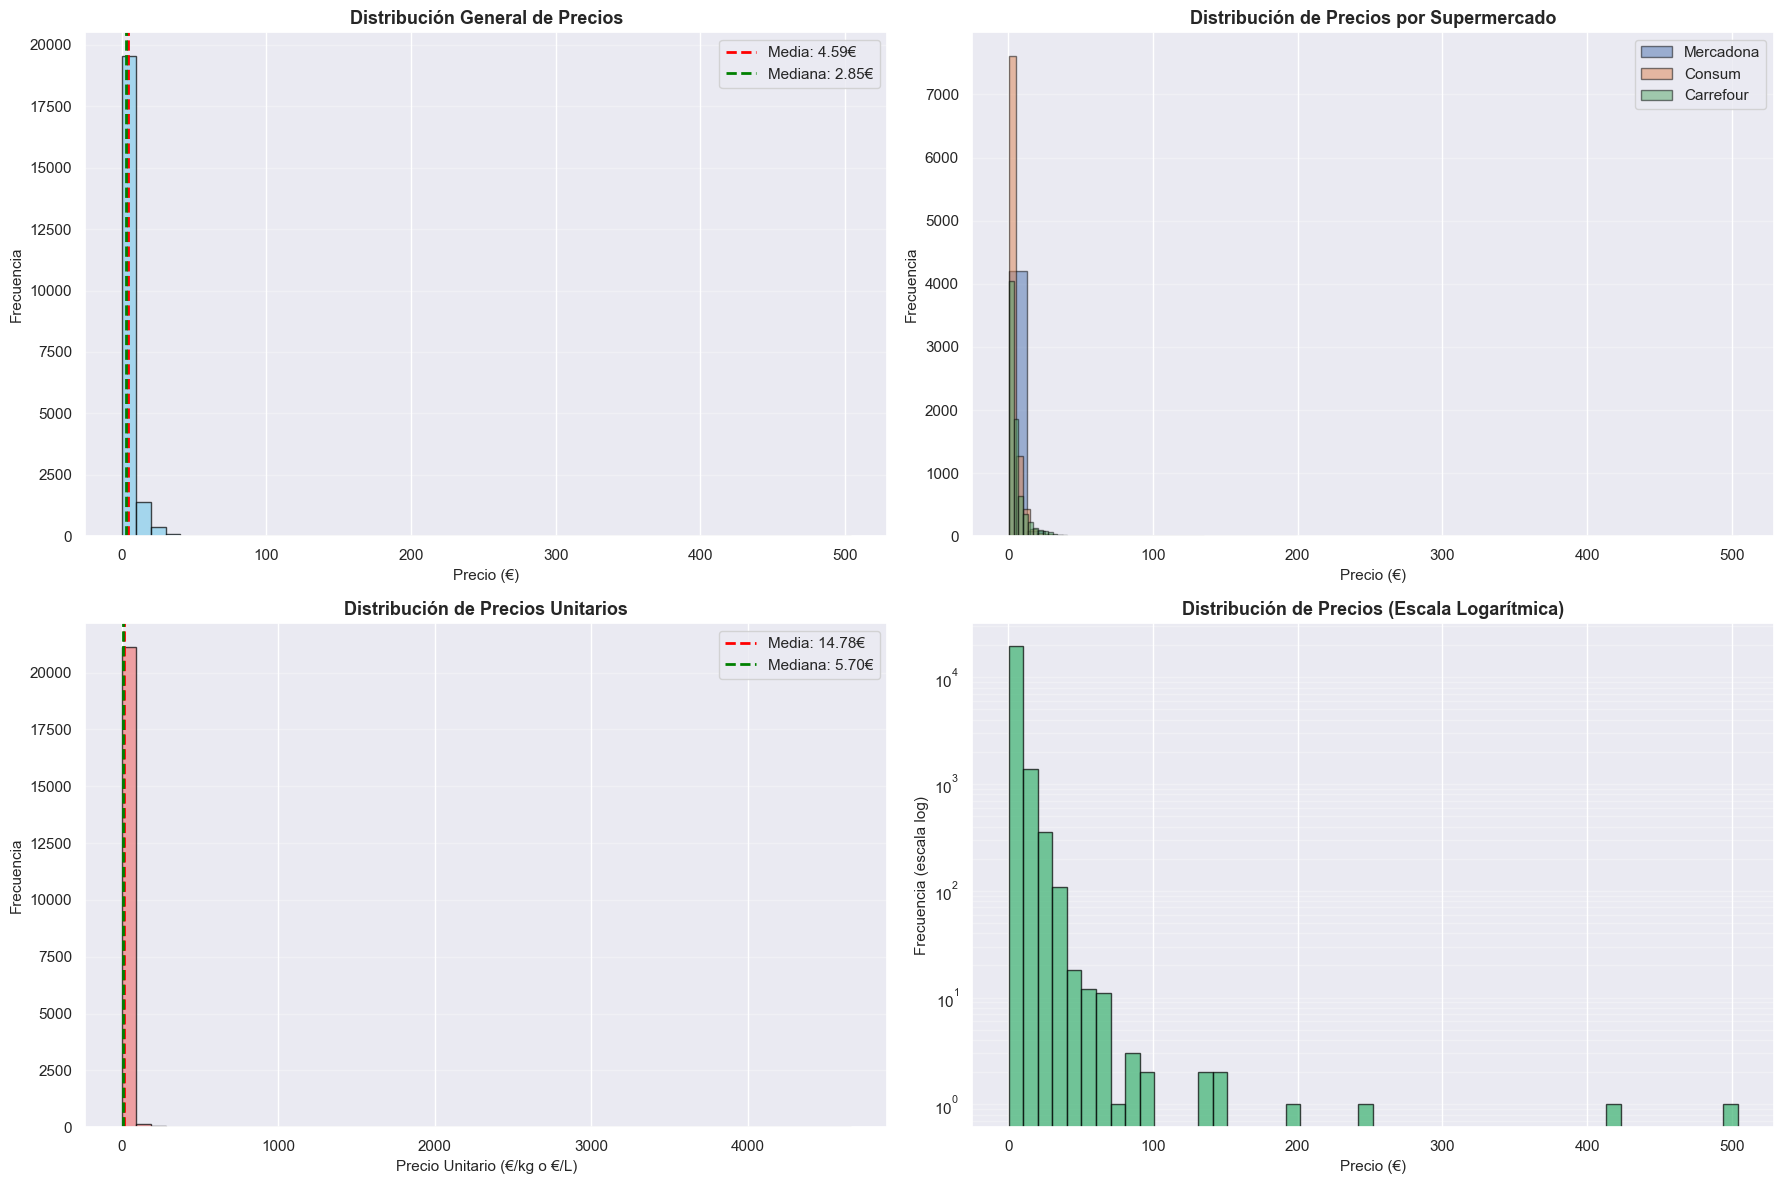

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
df = df_completo

# 5.1 Histograma general
ax1 = axes[0, 0]
ax1.hist(df["precio"], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(df["precio"].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["precio"].mean():.2f}€')
ax1.axvline(df["precio"].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["precio"].median():.2f}€')
ax1.set_xlabel('Precio (€)', fontsize=11)
ax1.set_ylabel('Frecuencia', fontsize=11)
ax1.set_title('Distribución General de Precios', fontweight='bold', fontsize=13)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 5.2 Histogramas comparativos por supermercado
ax2 = axes[0, 1]
for supermercado in df['supermercado'].unique():
    df_super = df[df['supermercado'] == supermercado]
    ax2.hist(df_super["precio"], bins=40, alpha=0.5, label=supermercado, edgecolor='black')

ax2.set_xlabel('Precio (€)', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Distribución de Precios por Supermercado', fontweight='bold', fontsize=13)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 5.3 Histograma de precio unitario
ax3 = axes[1, 0]
ax3.hist(df["precio_ud/Kg/L"], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
ax3.axvline(df["precio_ud/Kg/L"].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {df["precio_ud/Kg/L"].mean():.2f}€')
ax3.axvline(df["precio_ud/Kg/L"].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {df["precio_ud/Kg/L"].median():.2f}€')
ax3.set_xlabel('Precio Unitario (€/kg o €/L)', fontsize=11)
ax3.set_ylabel('Frecuencia', fontsize=11)
ax3.set_title('Distribución de Precios Unitarios', fontweight='bold', fontsize=13)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 5.4 Distribución logarítmica (para ver mejor valores extremos)
ax4 = axes[1, 1]
ax4.hist(df["precio"], bins=50, color='mediumseagreen', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Precio (€)', fontsize=11)
ax4.set_ylabel('Frecuencia (escala log)', fontsize=11)
ax4.set_title('Distribución de Precios (Escala Logarítmica)', fontweight='bold', fontsize=13)
ax4.set_yscale('log')
ax4.grid(axis='y', alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('histogramas_precios.png', dpi=300, bbox_inches='tight')
plt.show()

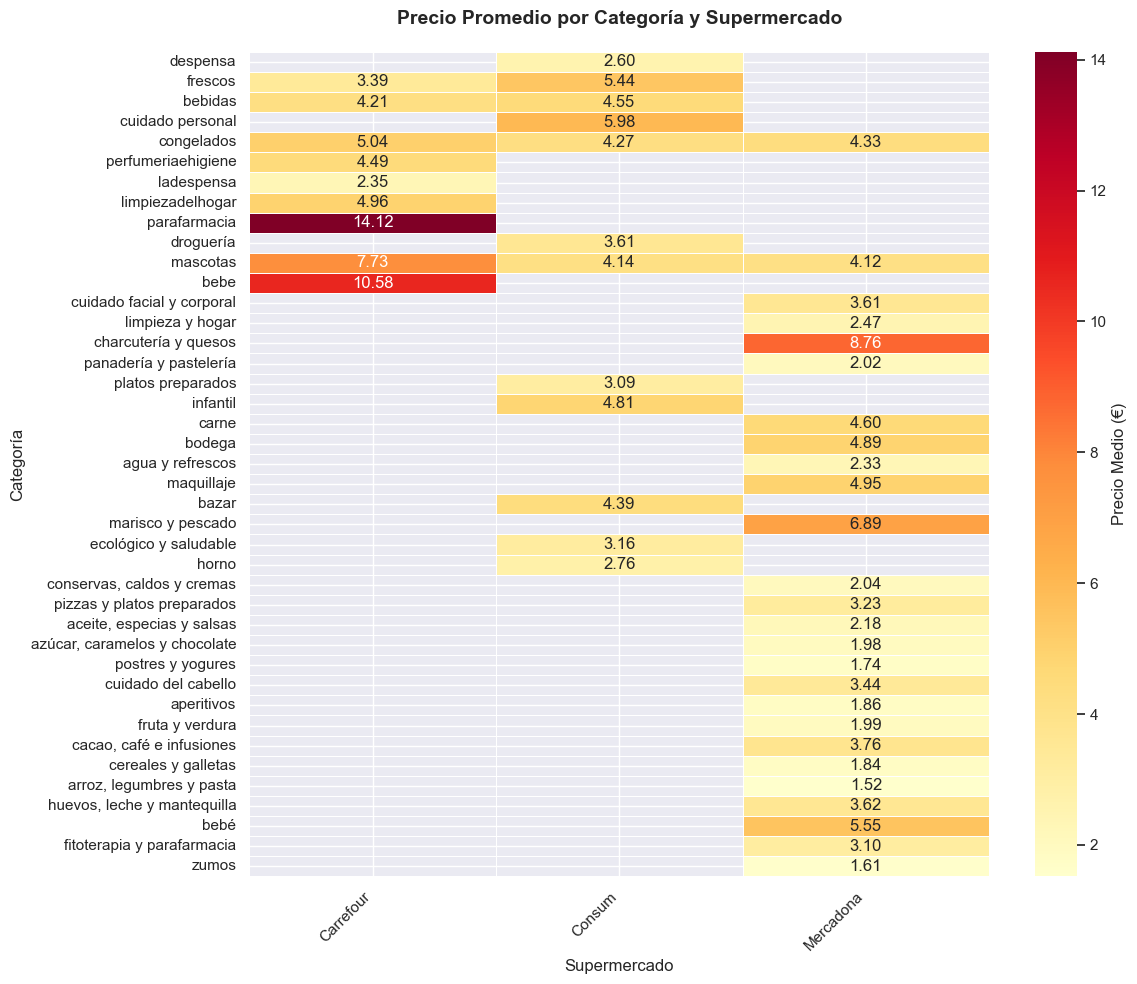

In [70]:
df = df_completo
if 'nombre_producto' in df.columns:
    # Identificar productos comunes
    productos_por_super = df.groupby('nombre_producto')['supermercado'].nunique()
    productos_comunes = productos_por_super[productos_por_super >= 2].index
    
    df_comunes = df[df['nombre_producto'].isin(productos_comunes)]
    
    # Crear pivot table
    pivot_precios = df_comunes.pivot_table(
        values="precio", 
        index='nombre_producto', 
        columns='supermercado',
        aggfunc='mean'
    ).dropna()
    
    if len(pivot_precios) > 1:
        # Correlación de precios entre supermercados
        correlacion = pivot_precios.corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlacion, 
                    annot=True, 
                    fmt='.3f', 
                    cmap='coolwarm', 
                    center=0,
                    square=True,
                    linewidths=1,
                    cbar_kws={"shrink": 0.8})
        plt.title('Correlación de Precios entre Supermercados\n(Productos Comunes)', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.savefig('heatmap_correlacion_precios.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"  Productos comunes analizados: {len(pivot_precios)}")
    else:
        print("  ⚠️ No hay suficientes productos comunes para correlación")

# Heatmap de precios promedio por categoría y supermercado
fig, ax = plt.subplots(figsize=(12, 10))

precio_cat_super = df.groupby(["categoria", 'supermercado'])["precio"].mean().unstack()
precio_cat_super_top = precio_cat_super.loc[df["categoria"].value_counts().index]

sns.heatmap(precio_cat_super_top, 
            annot=True, 
            fmt='.2f', 
            cmap='YlOrRd', 
            linewidths=0.5,
            cbar_kws={'label': 'Precio Medio (€)'},
            ax=ax)
plt.title('Precio Promedio por Categoría y Supermercado', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Supermercado', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('heatmap_precios_categoria_supermercado.png', dpi=300, bbox_inches='tight')
plt.show()

Se observa que los precios medios son más altos en Carrefour, debido a los productos de parafarmacia, bebe y mascotas.  
En terminos generales Consum presenta los precios medios más bajos y Mercadona presenta una gama más amplia de precios medios, también debido a una mayor distribución de sus productos en diversas categorías por la especificidad de las mismas.  

Sin embargo cabe destacar que es Carrefour el que presenta un precio medio más bajo en el conjunto de productos de alimentación (despensa, bebidas, frescos) presentes en Consum y Carrefour, y equivalentes a categorías como charcutería y quesos, zumos, bodega, arroz, legumbres y pasta de Mercadona, los cuales dan una media más elevada.  
En cuanto a productos congelados, el más barato es Consum, estando Carrefour en este caso en último lugar.

In [71]:
compra_dict = {
    "item_1" :{"producto" : "leche entera",
    "formato" : "1 l"},

    "item_2" :{"producto" : "agua",
    "formato" : "1 l"},

    "item_3" :{"producto" : "azucar",
    "formato" : "1 kg"},

    "item_4" :{"producto" : "cafe",
    "formato" : "500 g"},

    "item_5" :{"producto" : "yogur",
    "formato" : "8 u"},

    "item_6" :{"producto" : "patatas",
    "formato" : "1 kg"},

    "item_7" :{"producto" : "mejillon",
    "formato" : "kg"},
    
    "item_8" :{"producto" : "zumo",
    "formato" : "1 l"},

    "item_9" :{"producto" : "aceite",
    "formato" : "1 l"},

    "item_10" :{"producto" : "huevos",
    "formato" : "24"},

    "item_11" :{"producto" : "arroz",
    "formato" : "kg"},

    "item_12" :{"producto" : "jabon de manos",
    "formato" : "500 ml"},

    "item_13" :{"producto" : "lejia",
    "formato" : "5 l"},

    "item_14" :{"producto" : "cola",
    "formato" : "2 l"},

    "item_15" :{"producto" : "secreto",
    "formato" : " "}
}

In [72]:
# Se genera una lista de la compra genérica para su comparación de precios
lista_mercadona = []
lista_consum = []
lista_carrefour = []

for item in compra_dict:
    producto = compra_dict[item]["producto"]
    formato = compra_dict[item]["formato"]
    
    lista_mercadona.append(df_Mercadona[(df_Mercadona["nombre"].apply(lambda x: producto in x.lower())) & (df_Mercadona["formato"].apply(lambda x: formato in x.lower()))].min())
    lista_consum.append(df_Consum[(df_Consum["nombre"].apply(lambda x: producto in x.lower())) & (df_Consum["formato"].apply(lambda x: formato in x.lower()))].min())
    lista_carrefour.append(df_Carrefour[(df_Carrefour["nombre"].apply(lambda x: producto in x.lower())) & (df_Carrefour["formato"].apply(lambda x: formato in x.lower()))].min())


In [73]:
df_compra_mercadona = pd.DataFrame(lista_mercadona)
df_compra_consum = pd.DataFrame(lista_consum)
df_compra_carrefour = pd.DataFrame(lista_carrefour)
df_compra = pd.concat([df_compra_mercadona, df_compra_consum, df_compra_carrefour])
display(
df_compra.groupby("supermercado").describe(),
df_compra.groupby("supermercado")["precio"].sum()
)

precio                                    precio_ud/Kg/L       \
              count mean  std  min  25%  50%  75%  max          count mean   
supermercado                                                                 
Carrefour     15.00 2.00 1.62 0.40 0.97 1.33 2.39 5.69          15.00 1.94   
Consum        15.00 2.12 1.76 0.40 0.94 1.75 2.49 6.29          15.00 2.45   
Mercadona     15.00 2.08 1.64 0.40 0.94 1.60 2.77 5.75          15.00 2.09   

                                             
              std  min  25%  50%  75%   max  
supermercado                                 
Carrefour    2.67 0.13 0.44 0.99 1.96 10.78  
Consum       3.29 0.18 0.60 1.35 2.44 12.58  
Mercadona    2.93 0.01 0.39 0.97 2.17 10.80

supermercado
Carrefour   30.00
Consum      31.78
Mercadona   31.27
Name: precio, dtype: float64

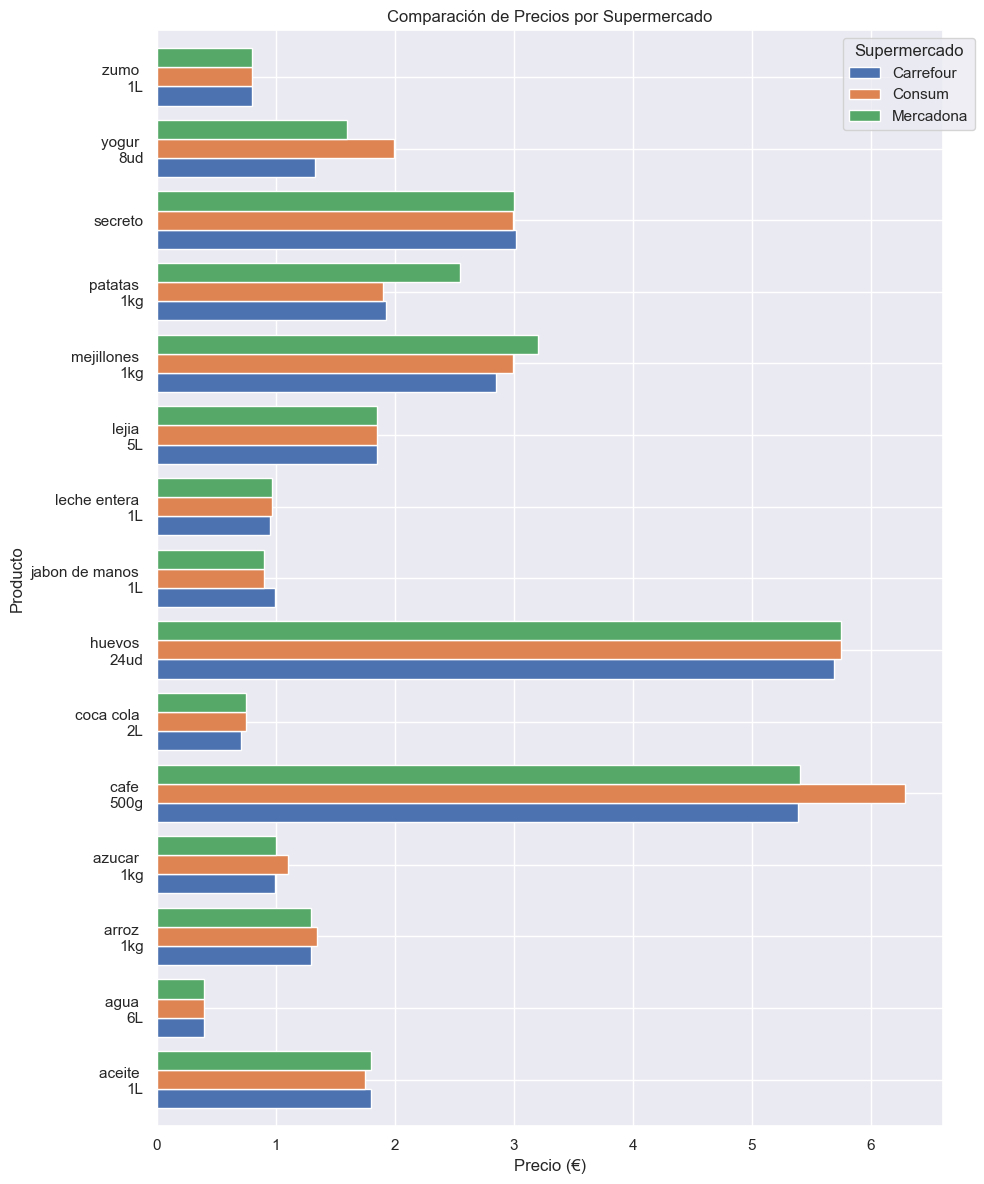

In [74]:
# Estandarización del nombre del producto
producto = ['leche entera \n1L', 'agua \n6L', 'azucar \n1kg', 'cafe \n500g', 'yogur \n8ud', 'patatas \n1kg', 'mejillones \n1kg',
            'zumo \n1L', 'aceite \n1L', 'huevos \n24ud', 'arroz \n1kg', 'jabon de manos \n1L', 'lejia \n5L', 'coca cola \n2L', 'secreto']
df_compra["nombre"] = producto * 3

df_pivot = df_compra.pivot_table(
    index= "nombre", 
    columns= 'supermercado', 
    values= 'precio'
)

# Graficar
df_pivot.plot(kind='barh', figsize=(10, 12), width=0.8)
plt.xlabel('Precio (€)')
plt.ylabel('Producto')
plt.title('Comparación de Precios por Supermercado')
plt.legend(title='Supermercado', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

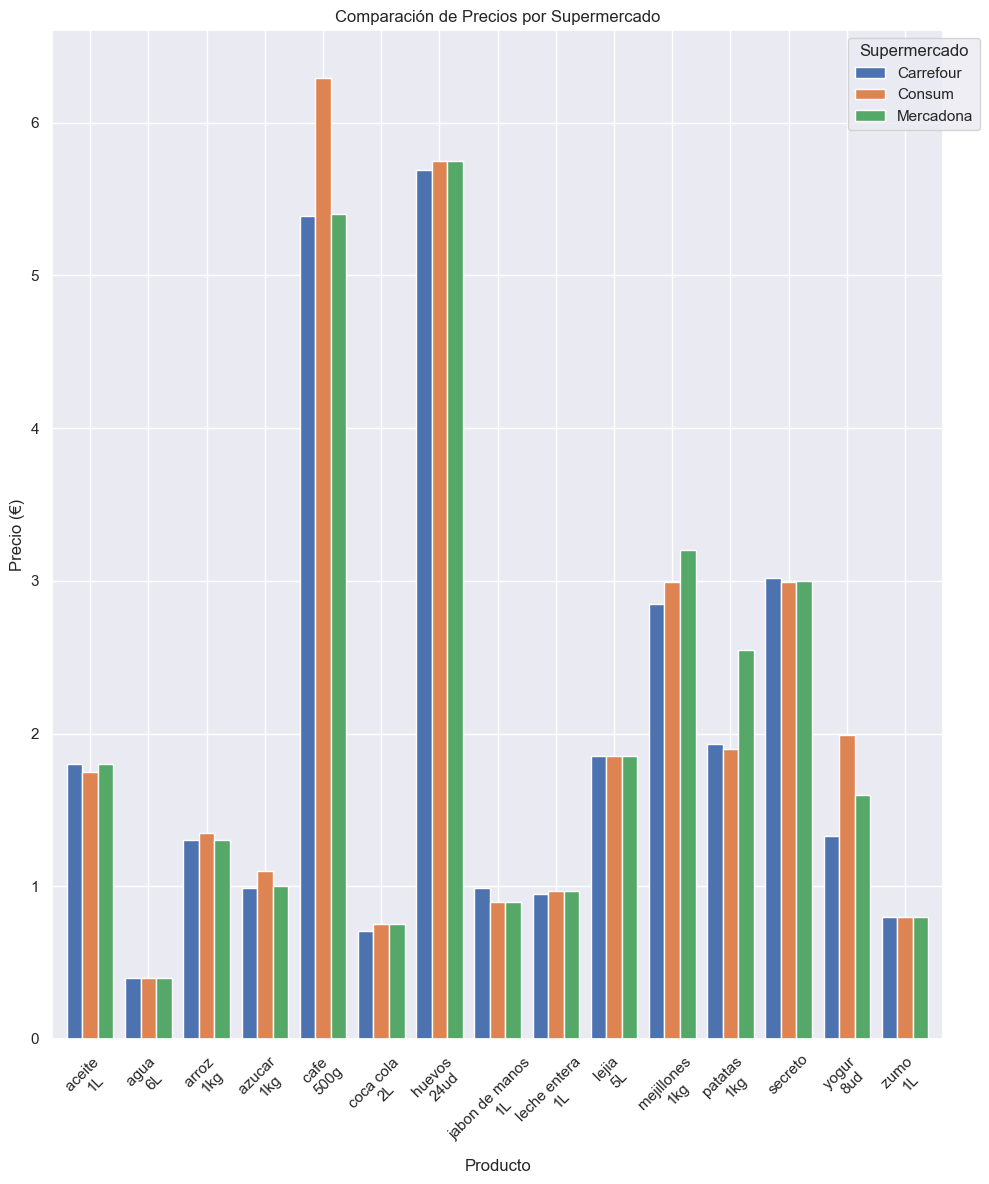

In [79]:
# Estandarización del nombre del producto
producto = ['leche entera \n1L', 'agua \n6L', 'azucar \n1kg', 'cafe \n500g', 'yogur \n8ud', 'patatas \n1kg', 'mejillones \n1kg',
            'zumo \n1L', 'aceite \n1L', 'huevos \n24ud', 'arroz \n1kg', 'jabon de manos \n1L', 'lejia \n5L', 'coca cola \n2L', 'secreto']
df_compra["nombre"] = producto * 3

df_pivot = df_compra.pivot_table(
    index= "nombre", 
    columns= 'supermercado', 
    values= 'precio'
)

# Graficar
df_pivot.plot(kind='bar', figsize=(10, 12), width=0.8)
plt.xlabel('Producto')
plt.xticks(rotation= 45)
plt.ylabel('Precio (€)')
plt.title('Comparación de Precios por Supermercado')
plt.legend(title='Supermercado', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Realizando una cesta de la compra genérica con 15 items y comparando sus precios por supermercado podemos obervar que:  
La cesta más barata se encuentra en Carrefour, aunque la diferencia entre los tres supermercados no alcanza los 2€ de diferencia

In [75]:
producto = "cafe"
formato = "500 g"
display(
df_Mercadona[(df_Mercadona["nombre"].apply(lambda x: producto in x.lower())) & (df_Mercadona["formato"].apply(lambda x: formato in x.lower()))],
df_Consum[(df_Consum["nombre"].apply(lambda x: producto in x.lower())) & (df_Consum["formato"].apply(lambda x: formato in x.lower()))],
df_Carrefour[(df_Carrefour["nombre"].apply(lambda x: producto in x.lower())) & (df_Carrefour["formato"].apply(lambda x: formato in x.lower()))]
)

,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,subcategoria,supermercado
1031,cafe molido natural hacendado,Paquete 500 g,5.40,10.80,Hacendado,"cacao, café e infusiones",café molido y en grano,Mercadona
1033,cafe molido mezcla fuerte hacendado,Paquete 500 g,5.60,11.20,Hacendado,"cacao, café e infusiones",café molido y en grano,Mercadona
1035,cafe molido natural fuerte hacendado,Paquete 500 g,5.40,10.80,Hacendado,"cacao, café e infusiones",café molido y en grano,Mercadona
1037,cafe molido descafeinado natural hacendado,Paquete 500 g,5.60,11.20,Hacendado,"cacao, café e infusiones",café molido y en grano,Mercadona


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
3690,cafe grano colombia 500 gr,500 gr,12.95,25.90,BONKA,despensa,Consum
3691,cafe grano natural 500 gr,500 gr,8.95,17.90,BONKA,despensa,Consum
3695,cafe en grano puro arabica 500 gr,500 gr,12.95,25.90,BONKA,despensa,Consum
4000,cafe grano descafeinado 500 gr,500 gr,7.15,14.30,CONSUM,despensa,Consum
4002,cafe grano natural 500 gr,500 gr,6.29,12.58,CONSUM,despensa,Consum
5514,cafe grano colombia 500 gr,500 gr,15.95,31.90,L'OR,despensa,Consum
5601,cafe en grano qualità oro 500 gr,500 gr,17.45,34.90,LAVAZZA,despensa,Consum
5699,cafe grano natural 500 gr,500 gr,11.99,23.98,MARCILLA,despensa,Consum
5704,cafe molido mezcla 50/50 500 gr,500 gr,7.59,15.18,MARCILLA,despensa,Consum
5706,cafe molido natural 500 gr,500 gr,7.59,15.18,MARCILLA,despensa,Consum


,nombre,formato,precio,precio_ud/Kg/L,marca,categoria,supermercado
2483,cafe molido natural carrefour classic 500 g,500 g,5.39,10.78,carrefour,ladespensa,Carrefour
2517,cafe molido mezcla carrefour classic 500 g,500 g,5.59,11.18,carrefour,ladespensa,Carrefour
2816,cafe en grano natural carrefour classic 500 g,500 g,5.75,11.50,carrefour,ladespensa,Carrefour


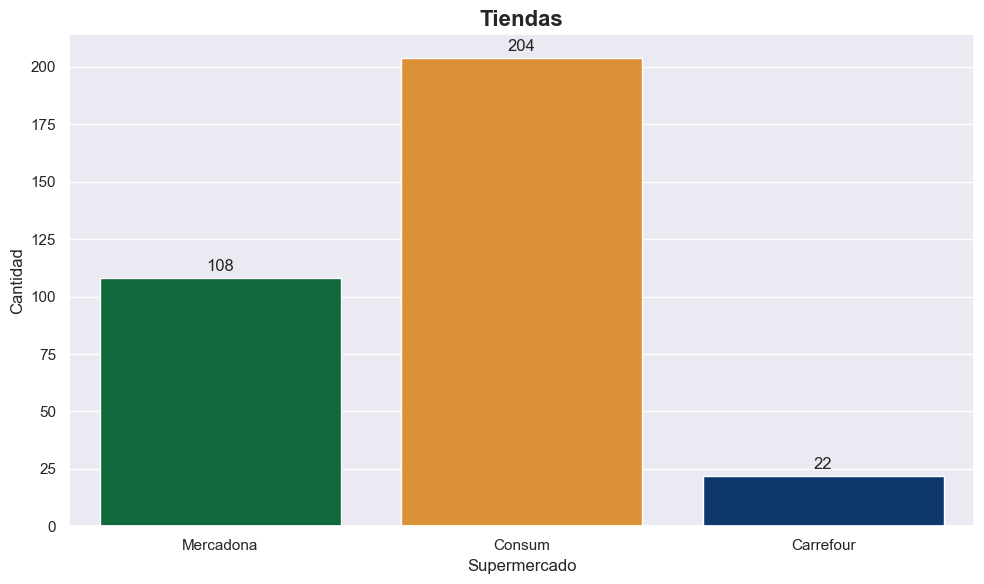

In [76]:
# Datos
data = {
    "supermercado": ["Mercadona", "Consum", "Carrefour"],
    "cantidad": [108, 204, 22]
}
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='supermercado', y='cantidad', palette= colores)

# Personalizar el gráfico
plt.title('Tiendas', fontsize=16, fontweight='bold')
plt.xlabel('Supermercado', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

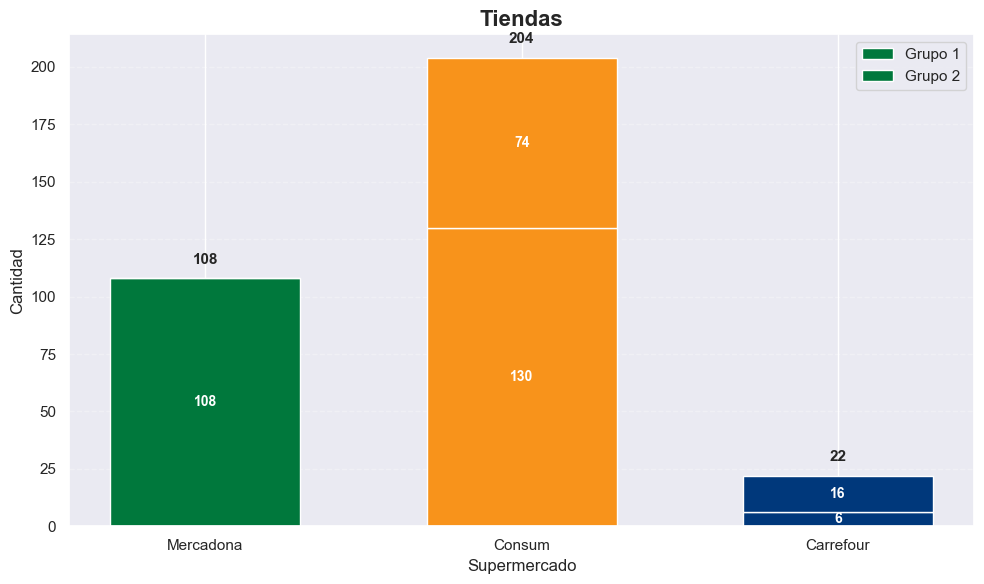

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos reorganizados con subgrupos
data = {
    "supermercado": ["Mercadona", "Consum", "Consum", "Carrefour", "Carrefour"],
    "grupo": ["Total", "Grupo 1", "Grupo 2", "Grupo 1", "Grupo 2"],
    "cantidad": [108, 130, 74, 6, 16]
}
df = pd.DataFrame(data)

# Preparar datos para barras apiladas
mercadona_val = 108
consum_grupo1 = 130
consum_grupo2 = 74
carrefour_grupo1 = 6
carrefour_grupo2 = 16

supermercados = ['Mercadona', 'Consum', 'Carrefour']
grupo1_values = [mercadona_val, consum_grupo1, carrefour_grupo1]
grupo2_values = [0, consum_grupo2, carrefour_grupo2]

# Definir colores
colores = ["#00783c", "#F8931B", "#00387b"]
color_grupo2 = ["#00783c", "#F8931B", "#00387b"]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

x_pos = np.arange(len(supermercados))
width = 0.6

# Barras del grupo 1 (base)
bars1 = ax.bar(x_pos, grupo1_values, width, label='Grupo 1', color=colores)

# Barras del grupo 2 (apiladas encima)
bars2 = ax.bar(x_pos, grupo2_values, width, bottom=grupo1_values, 
               label='Grupo 2', color=color_grupo2)

# Personalizar el gráfico
ax.set_title('Tiendas', fontsize=16, fontweight='bold')
ax.set_xlabel('Supermercado', fontsize=12)
ax.set_ylabel('Cantidad', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(supermercados)

# Añadir valores en las barras
for i, (v1, v2) in enumerate(zip(grupo1_values, grupo2_values)):
    # Valor del grupo 1
    if v1 > 0:
        ax.text(i, v1/2, str(int(v1)), ha='center', va='center', 
                fontweight='bold', color='white', fontsize=10)
    
    # Valor del grupo 2 (solo para Consum y Carrefour)
    if v2 > 0:
        ax.text(i, v1 + v2/2, str(int(v2)), ha='center', va='center', 
                fontweight='bold', color='white', fontsize=10)
    
    # Total encima de la barra
    total = v1 + v2
    ax.text(i, total + 5, str(int(total)), ha='center', va='bottom', 
            fontweight='bold', fontsize=11)

# Añadir leyenda (solo para los que tienen grupo 2)
ax.legend(loc='upper right')

# Añadir grid
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Finalmente observamos la cantidad de tiendas presentes en Valencia para cada supermercado.  
Consum es el que tiene una mayor presencia con un total de 204 tiendas, divididas en 130 grandes superficies y 74 charter (pequeñas superfices que solo venden productos de alimentacion y básicos).  
Le sigue Mercadona con 108 tiendas y por último Carrefour, con 22 tiendas en total, de las cuales 6 son grandes superficies que además de supermercado poseen otras secciones como electrónica, electrodomésticos, mobiliario o ropa, siendo el resto pequeñas superficies tipo charter, en ocasiones asociadas a gasolineras.  

Por todo esto parece que el dominio de Mercadona no está tan justificado, ya que Consum presenta mayor facilidad de compra en terminos generales, al tener más ubicaciones y una mayor variedad de productos entre los que escoger por un precio medio por producto muy similar, siendo la diferencia en la cesta de la compra de muestra de tan solo 50 céntimos a favor de Mercadona.  
Si está más justificado el dominio de Mercadona sobre Carrefour en cuanto a facilidad de compra, ya que las grandes superficies de Carrefour se encuentran en zonas más de extrarradio debido a la gran superficie que ocupan.